# <center>T-068 Control de Calidad Agroalimentario: Análisis Predictivo en Uvas a Diferentes Puntos de Madurez

**Nombre y apellidos:** Anthony Valerio Gomez Lizana

**Usuario VIU:** anthonyvalerio.gomez (anthonyvalerio.gomez@student.universidadviu.com)

---
# Comprensión de Datos
---

Importamos las bibliotecas a utilizar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from scipy.cluster import hierarchy
from scipy.signal import savgol_filter
from scipy import stats
from IPython.display import display

Se sube los archivos csv al local de google colab, donde los datos del espectrómetro y calidad se guarda con los nombres matriz_x y matriz_y respectivamente.

In [2]:
# Lee los archivos CSV
matriz_x = pd.read_csv('/content/MatrizX_Uva.csv')  # Datos del espectrómetro
matriz_y = pd.read_csv('/content/MatrizY_Uva.csv', delimiter=';')  # Valores de Brix y pH



Se muestra el contenido del archivo matriz_y

In [3]:
# Imprimir la cantidad de filas y columnas
print(f"Cantidad de filas y columnas en matriz_y: {matriz_y.shape[0]} filas, {matriz_y.shape[1]} columnas")

# Mostrar las primeras filas del DataFrame
matriz_y.head()


Cantidad de filas y columnas en matriz_y: 88 filas, 2 columnas


,º Brix,pH
0,15.1,2.87
1,20.6,3.40
2,18.9,3.43
3,23.1,3.31
4,19.1,3.25


Se modifica el nombre de la primera columna para un manejo adecuado

In [4]:
matriz_y = matriz_y.rename(columns={"º Brix": "Brix"})
print(matriz_y.shape)
matriz_y.head()

(88, 2)


,Brix,pH
0,15.1,2.87
1,20.6,3.40
2,18.9,3.43
3,23.1,3.31
4,19.1,3.25


Se muestra el archivo matriz_x

In [5]:
# Imprimir la cantidad de filas y columnas
print(f"Cantidad de filas y columnas en matriz_x: {matriz_x.shape[0]} filas, {matriz_x.shape[1]} columnas")

# Mostrar las primeras 15 filas del DataFrame
matriz_x.head(15)


Cantidad de filas y columnas en matriz_x: 97 filas, 910 columnas


,Name:,Multiple SPC Files,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 900,Unnamed: 901,Unnamed: 902,Unnamed: 903,Unnamed: 904,Unnamed: 905,Unnamed: 906,Unnamed: 907,Unnamed: 908,Unnamed: 909
0,Author:,SPCREADR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date:,06-May-2024 15:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Modification Date:,06-May-2024 15:21:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Description:,data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,sample name,Full name,analysis date,Subfile Index,Time Index,type of fermentation,Sampling time,Replicate,Sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Wavenumber (cm-1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,679.070734,675.339576,671.608418,667.877260,664.146102,660.414944,656.683786,652.952629,649.221471,NaN
8,Wavelenght (nm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14726.006442,14807.365594,14889.628736,14972.811020,15056.927935,15141.995325,15228.029389,15315.046700,15403.064210,NaN
9,NaN,MAA01_T002_1_2021-08-17T05-20-,MAA01_T002_1_2021-08-17T05-20-31,021-08-17T05-20-31,1,2,MAA,T002,_1,MAA01,...,0.301044,0.304629,0.306726,0.314117,0.318777,0.315123,0.317923,0.325495,0.326862,NaN


El dataset matriz_x necesita darle forma para una estructura adecuada, para ello se eliminará las filas con información innecesaria y se adaptará de la siguiente forma

In [6]:
# Elimina las primeras 6 filas
matriz_x = matriz_x.drop(matriz_x.index[:6])

# Se llena los valores de la primera fila con los de la segunda donde sean NaN
matriz_x.iloc[0] = matriz_x.iloc[0].combine_first(matriz_x.iloc[1])

# Se elimina la fila con indice 1
matriz_x = matriz_x.drop(matriz_x.index[1])
matriz_x = matriz_x.drop(matriz_x.index[1])

# Elimina la primera columna
matriz_x = matriz_x.drop(matriz_x.columns[0], axis=1)

# Elimina la última columna
matriz_x = matriz_x.drop(matriz_x.columns[-1], axis=1)

# Restablece la fila 7 (índice 0) como los títulos de las columnas
matriz_x.columns = matriz_x.iloc[0]

# Resetea los índices para evitar saltos en la numeración
matriz_x = matriz_x.reset_index(drop=True)

# Elimina la fila duplicada en el indice 0
matriz_x = matriz_x.drop(matriz_x.index[0])

# Verifica el resultado
matriz_x.head()


6,sample name,Full name,analysis date,Subfile Index,Time Index,type of fermentation,Sampling time,Replicate,Sample,3999.801245,...,682.801892,679.070734,675.339576,671.608418,667.87726,664.146102,660.414944,656.683786,652.952629,649.221471
1,MAA01_T002_1_2021-08-17T05-20-,MAA01_T002_1_2021-08-17T05-20-31,021-08-17T05-20-31,1,2,MAA,T002,_1,MAA01,0.001689,...,0.298587,0.301044,0.304629,0.306726,0.314117,0.318777,0.315123,0.317923,0.325495,0.326862
2,MAA01_T003_1_2021-09-03T06-47-,MAA01_T003_1_2021-09-03T06-47-20,021-09-03T06-47-20,2,3,MAA,T003,_1,MAA01,0.001734,...,0.301015,0.304151,0.307095,0.309760,0.314504,0.319880,0.326589,0.326172,0.328379,0.338441
3,MAA01_T004_1_2021-09-06T06-01-,MAA01_T004_1_2021-09-06T06-01-42,021-09-06T06-01-42,3,4,MAA,T004,_1,MAA01,0.002339,...,0.300593,0.304374,0.306904,0.306412,0.309288,0.314805,0.319341,0.324031,0.324659,0.326553
4,MAA01_T005_1_2021-09-15T06-17-,MAA01_T005_1_2021-09-15T06-17-56,021-09-15T06-17-56,4,5,MAA,T005,_1,MAA01,0.002529,...,0.301424,0.305853,0.307145,0.310346,0.314272,0.317329,0.323263,0.324755,0.328160,0.332749
5,MAA02_T001_1_2021-08-13T08-52-,MAA02_T001_1_2021-08-13T08-52-03,021-08-13T08-52-03,5,1,MAA,T001,_1,MAA02,0.002649,...,0.299976,0.301685,0.306150,0.310041,0.314792,0.316666,0.316730,0.319089,0.321750,0.328289


Teniendo la estructura adecuada observamos que entre las variables esta el analysis date, esta variable se modificará el formato para obtener dos columnas extras una de fecha y otra que contabilizará el número de días según la columna Sample teniendo como referencia siempre la primera Fecha a contabilizar y las demás del mismo Sample se contarán los días.

In [7]:
# Función para agregar el 0 faltante al año
def corregir_fecha(fecha):
    if fecha.startswith('021'):
        fecha = '2021' + fecha[3:]
    return fecha

# Aplicar la corrección a la columna 'analysis date'
matriz_x['analysis date corregido'] = matriz_x['analysis date'].apply(corregir_fecha)

# Convertir la columna corregida a datetime
matriz_x['analysis date corregido'] = pd.to_datetime(matriz_x['analysis date corregido'], format='%Y-%m-%dT%H-%M-%S')

# Convertir al formato deseado dd/mm/yyyy
matriz_x['Fecha'] = matriz_x['analysis date corregido'].dt.strftime('%d/%m/%Y')

# Eliminar la columna 'analysis date corregido'
matriz_x = matriz_x.drop(columns=["analysis date corregido"])

# Eliminar las columnas no necesarias
matriz_x = matriz_x.drop(columns=["sample name", "Time Index", "Replicate"])

# Mover la columna 'Fecha' al lado de 'analysis date'
matriz_x.insert(2, "Fecha", matriz_x.pop("Fecha"))

# Asegurarnos de que la columna 'Fecha' está en formato datetime
matriz_x['Fecha'] = pd.to_datetime(matriz_x['Fecha'], format='%d/%m/%Y')

# Calcular la columna 'Días' tomando la primera fecha de cada muestra como referencia
matriz_x['Días'] = matriz_x.groupby('Sample')['Fecha'].transform(lambda x: (x - x.min()).dt.days)

# Insertar la columna "Días" en la posición 3
matriz_x.insert(3, "Días", matriz_x.pop("Días"))

# Renombrar la columna "type of fermentation" a "Tipo de uva"
matriz_x.rename(columns={"type of fermentation": "Tipo de uva"}, inplace=True)

# Mostrar las primeras filas para verificar
matriz_x.head()


6,Full name,analysis date,Fecha,Días,Subfile Index,Tipo de uva,Sampling time,Sample,3999.801245,3996.070087,...,682.801892,679.070734,675.339576,671.608418,667.87726,664.146102,660.414944,656.683786,652.952629,649.221471
1,MAA01_T002_1_2021-08-17T05-20-31,021-08-17T05-20-31,2021-08-17,0,1,MAA,T002,MAA01,0.001689,0.001832,...,0.298587,0.301044,0.304629,0.306726,0.314117,0.318777,0.315123,0.317923,0.325495,0.326862
2,MAA01_T003_1_2021-09-03T06-47-20,021-09-03T06-47-20,2021-09-03,17,2,MAA,T003,MAA01,0.001734,0.001937,...,0.301015,0.304151,0.307095,0.309760,0.314504,0.319880,0.326589,0.326172,0.328379,0.338441
3,MAA01_T004_1_2021-09-06T06-01-42,021-09-06T06-01-42,2021-09-06,20,3,MAA,T004,MAA01,0.002339,0.002432,...,0.300593,0.304374,0.306904,0.306412,0.309288,0.314805,0.319341,0.324031,0.324659,0.326553
4,MAA01_T005_1_2021-09-15T06-17-56,021-09-15T06-17-56,2021-09-15,29,4,MAA,T005,MAA01,0.002529,0.002419,...,0.301424,0.305853,0.307145,0.310346,0.314272,0.317329,0.323263,0.324755,0.328160,0.332749
5,MAA02_T001_1_2021-08-13T08-52-03,021-08-13T08-52-03,2021-08-13,0,5,MAA,T001,MAA02,0.002649,0.002595,...,0.299976,0.301685,0.306150,0.310041,0.314792,0.316666,0.316730,0.319089,0.321750,0.328289


Ahora se elimina las columnas que no aportarán valor como el analysis date, Fecha y Subfile Index

In [8]:
# Eliminar las columnas 'analysis date', 'Subfile Index', 'Fecha' y 'Sampling time'
matriz_x = matriz_x.drop(columns=['analysis date', 'Subfile Index', 'Fecha', 'Sampling time'])

# Reiniciar el índice
matriz_x.reset_index(drop=True, inplace=True)

# Verificar que las columnas se hayan eliminado correctamente
matriz_x.head()



6,Full name,Días,Tipo de uva,Sample,3999.801245,3996.070087,3992.338929,3988.607771,3984.876613,3981.145456,...,682.801892,679.070734,675.339576,671.608418,667.87726,664.146102,660.414944,656.683786,652.952629,649.221471
0,MAA01_T002_1_2021-08-17T05-20-31,0,MAA,MAA01,0.001689,0.001832,0.001882,0.001575,0.001381,0.001887,...,0.298587,0.301044,0.304629,0.306726,0.314117,0.318777,0.315123,0.317923,0.325495,0.326862
1,MAA01_T003_1_2021-09-03T06-47-20,17,MAA,MAA01,0.001734,0.001937,0.001924,0.002143,0.001930,0.001777,...,0.301015,0.304151,0.307095,0.309760,0.314504,0.319880,0.326589,0.326172,0.328379,0.338441
2,MAA01_T004_1_2021-09-06T06-01-42,20,MAA,MAA01,0.002339,0.002432,0.002563,0.002956,0.002737,0.002351,...,0.300593,0.304374,0.306904,0.306412,0.309288,0.314805,0.319341,0.324031,0.324659,0.326553
3,MAA01_T005_1_2021-09-15T06-17-56,29,MAA,MAA01,0.002529,0.002419,0.001928,0.002048,0.002536,0.002728,...,0.301424,0.305853,0.307145,0.310346,0.314272,0.317329,0.323263,0.324755,0.328160,0.332749
4,MAA02_T001_1_2021-08-13T08-52-03,0,MAA,MAA02,0.002649,0.002595,0.002629,0.002663,0.002558,0.002439,...,0.299976,0.301685,0.306150,0.310041,0.314792,0.316666,0.316730,0.319089,0.321750,0.328289


Ahora el dataset matriz_x contiene las variables y una estructura adecuadas para el análisis, además de estar compuesta por las siguientes variables
*   Full name = Codificación al unir Sample, Samplin time, Replicate y analysis date
*   Días = La cantidad de días de cada Sample considerando la primera fecha como 0.
*   Sample = Es la muestra tomada del tipo de uva siendo la primera o segunda muestra con dichas características.
*   Tipo de uva = Tipo de uva con las siguientes nomenclaturas:

  M = Variedad, A=Arriba, M=Medio y B=Bajo.

  La primera letra M es de variedad Moscatel de Alejandría.

  La segunda letra indica la posición de la Viña en donde se tiene la medida de la uva sea A, M o B.

  La tercera letra indica la posición de racismo de uva dentro de la planta sea A, M o B.

A partir de la columna Sample se muestra los distintos números de onda (cm-1)


Identificación de valores nulos o faltantes de cada matriz

In [9]:
# Para matriz_x
nulos_x = matriz_x.isnull().sum()
print("Valores nulos en matriz_x:")
print(nulos_x[nulos_x > 0])

# Para matriz_y
if isinstance(matriz_y, pd.DataFrame):
    nulos_y = matriz_y.isnull().sum()
    print("Valores nulos en matriz_y:")
    print(nulos_y[nulos_y > 0])


Valores nulos en matriz_x:
Series([], dtype: int64)
Valores nulos en matriz_y:
Series([], dtype: int64)


Se observa en el resultado es 0 en cada matriz por lo que los datasets tienen completa su información

Ahora identificaremos los outliers de la matriz_y

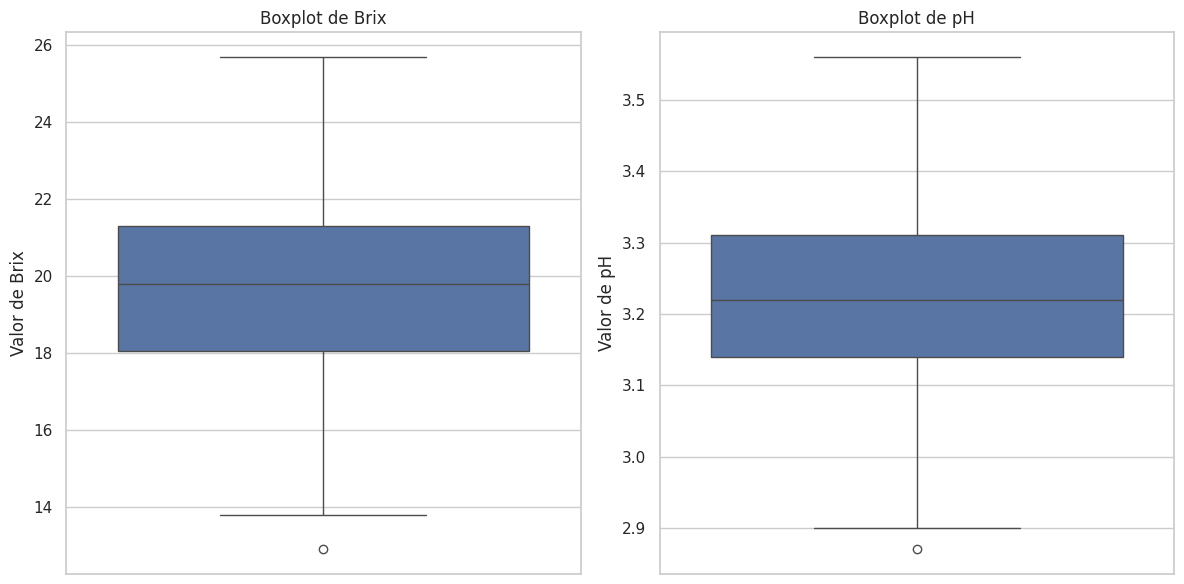

Outliers en la columna Brix: 9    12.9
Name: Brix, dtype: float64

Outliers en la columna pH: 0    2.87
Name: pH, dtype: float64


In [10]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos gráficos de boxplot (uno para cada variable)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar boxplot para la columna 'Brix'
sns.boxplot(data=matriz_y['Brix'], ax=ax[0])
ax[0].set_title('Boxplot de Brix')
ax[0].set_ylabel('Valor de Brix')

# Graficar boxplot para la columna 'pH'
sns.boxplot(data=matriz_y['pH'], ax=ax[1])
ax[1].set_title('Boxplot de pH')
ax[1].set_ylabel('Valor de pH')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Identificar y mostrar los valores de outliers en cada columna
def identificar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    # Limites para identificar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers[columna]

def identificar_outliers_index(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    # Limites para identificar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers_indices = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)].index
    return outliers_indices

# Identificar y mostrar outliers
outliers_brix = identificar_outliers(matriz_y, 'Brix')
outliers_ph = identificar_outliers(matriz_y, 'pH')

# Identificar los indices de los outliers en Brix y pH
indices_outliers_brix = identificar_outliers_index(matriz_y, 'Brix')
indices_outliers_ph = identificar_outliers_index(matriz_y, 'pH')

print("Outliers en la columna Brix:", outliers_brix)

print("\nOutliers en la columna pH:", outliers_ph)



Se visualizar que existe 1 caso de outliers en la gráfica de boxplot para la columnas Brix y pH, siendo los valores 12.9 en la posición 9 y 2.87 en la posición 0 respectivamente.

Los resultados de los outliers se encuentran dentro de los valores establecidos en los indicadores de Brix y pH, por lo que se conservarán para que puedan aportar información útil al modelo.

Ahora se grafica las muestras en todos los espectros para analizar la matriz_x

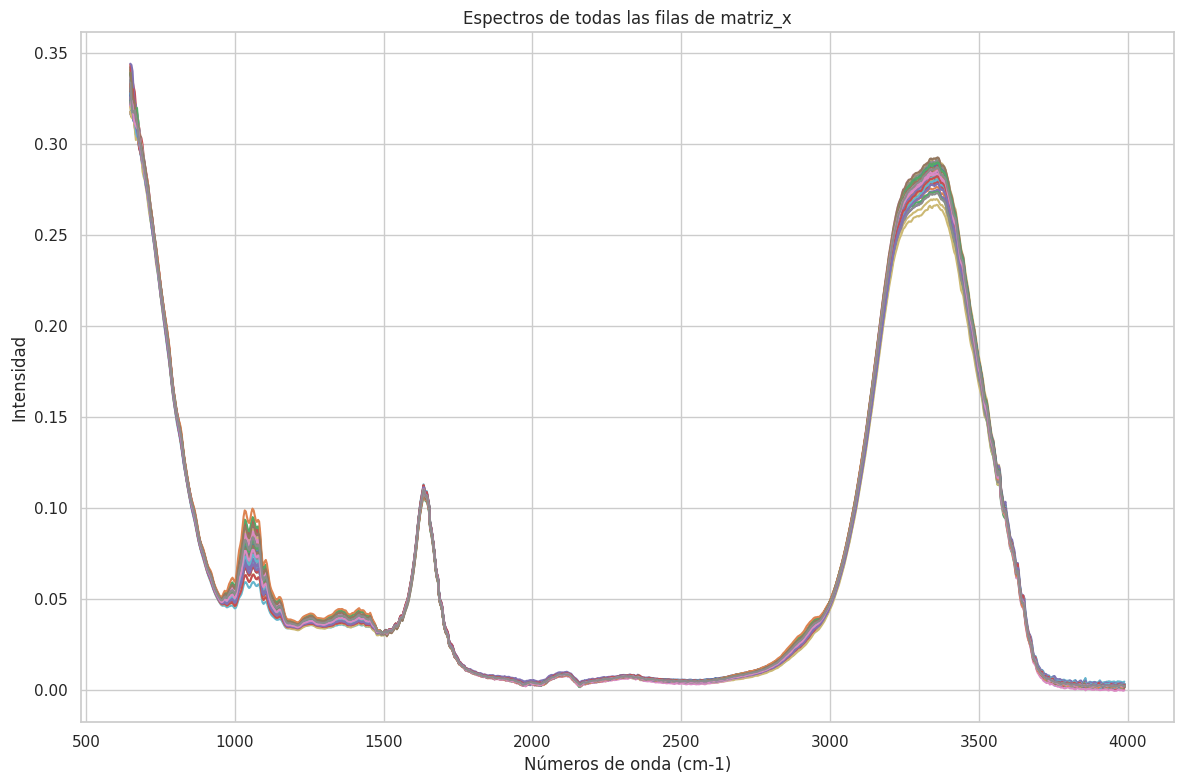

In [11]:
espectros = matriz_x.iloc[:, 7:]  # Todas las filas y columnas a partir de la 7
numeros_onda = matriz_x.columns[7:]  # Los nombres de las columnas de números de onda

# Graficamos los espectros de todas las filas
plt.figure(figsize=(12, 8))

# Iteramos sobre todas las filas
for i in range(espectros.shape[0]):
    plt.plot(numeros_onda, espectros.iloc[i, :], label=f'Fila {i+1}')  # Graficamos cada fila

# Configuramos el gráfico
plt.title('Espectros de todas las filas de matriz_x')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad')
plt.grid(True)
plt.tight_layout()
plt.show()


Se observa que los valores no se encuentran tan distantes entre sí, lo que da indicios a que no exista valores de outliers en la matriz_x, la diferencia más notoría se centra entre los números de onda entre (900, 1500) y (3200, 3400), se realizará el gráfico en ese rango para visualizar mejor el comportamiento de los datos.

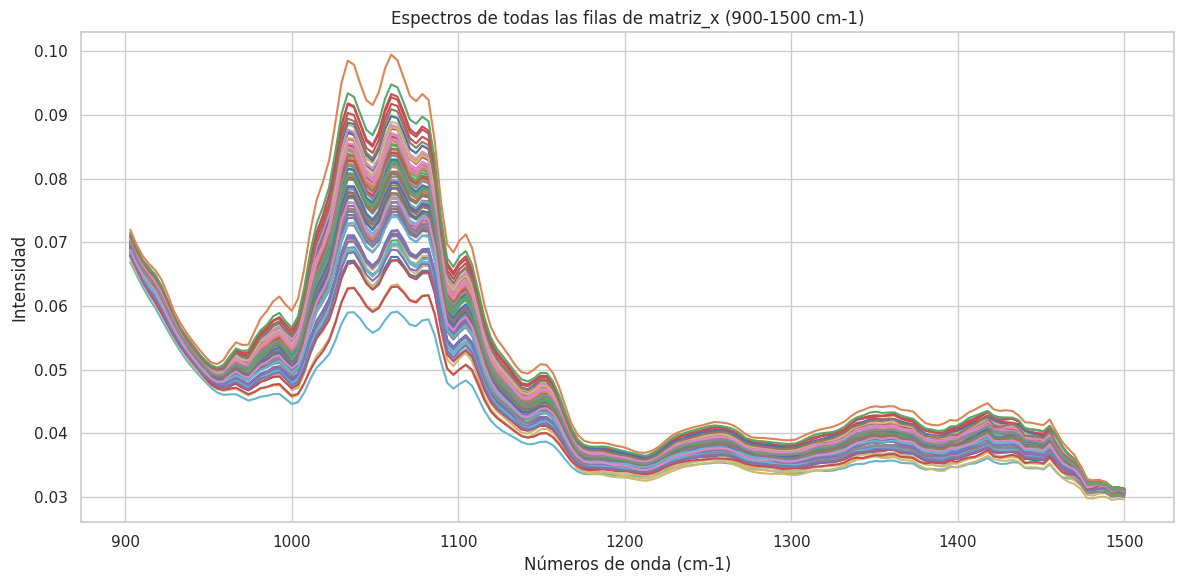

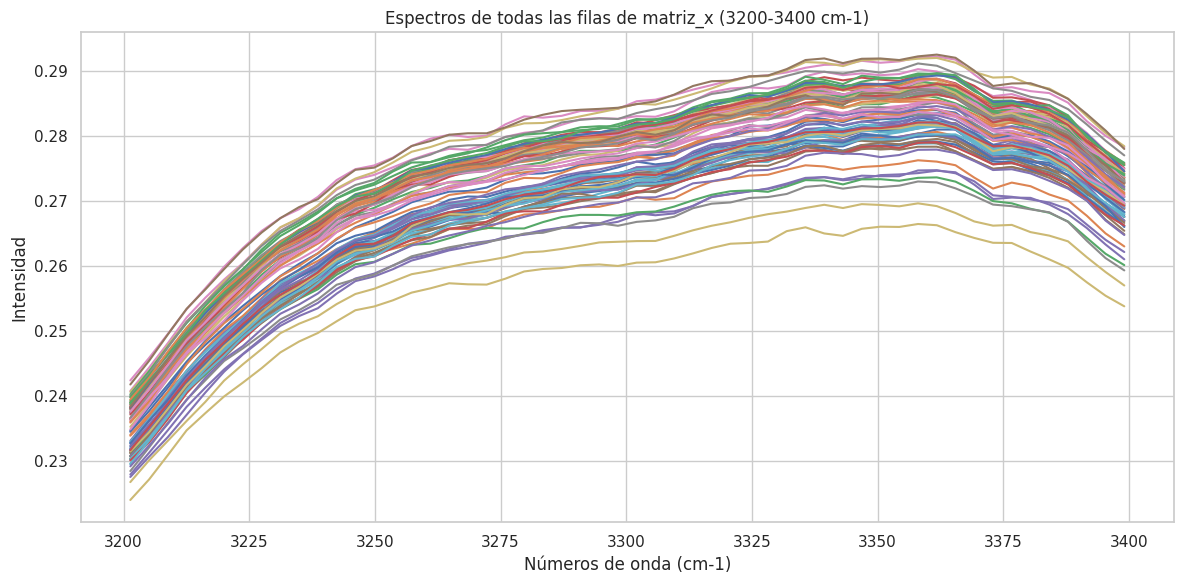

In [12]:
# Filtramos los números de onda en los rangos deseados
rango_espectros_1 = (numeros_onda >= 900) & (numeros_onda <= 1500)
rango_espectros_2 = (numeros_onda >= 3200) & (numeros_onda <= 3400)

# Espectros filtrados para cada rango
espectros_filtrados_1 = espectros.loc[:, rango_espectros_1]
espectros_filtrados_2 = espectros.loc[:, rango_espectros_2]

numeros_onda_filtrados_1 = numeros_onda[rango_espectros_1]  # Números de onda filtrados para el primer rango
numeros_onda_filtrados_2 = numeros_onda[rango_espectros_2]  # Números de onda filtrados para el segundo rango

# Graficamos los espectros de todas las filas en el primer rango
plt.figure(figsize=(12, 6))
for i in range(espectros_filtrados_1.shape[0]):
    plt.plot(numeros_onda_filtrados_1, espectros_filtrados_1.iloc[i, :], label=f'Fila {i+1}')  # Graficamos cada fila
plt.title('Espectros de todas las filas de matriz_x (900-1500 cm-1)')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficamos los espectros de todas las filas en el segundo rango
plt.figure(figsize=(12, 6))
for i in range(espectros_filtrados_2.shape[0]):
    plt.plot(numeros_onda_filtrados_2, espectros_filtrados_2.iloc[i, :], label=f'Fila {i+1}')  # Graficamos cada fila
plt.title('Espectros de todas las filas de matriz_x (3200-3400 cm-1)')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad')
plt.grid(True)
plt.tight_layout()
plt.show()


Todas las muestran siguen el mismo patrón, casi ni parece cruzarse entre sí, es un indicio de que en estos niveles de números de onda captan mayor la variabilidad de las muestras entre sí.

----
# Selección de Variables
----

Se tiene como finalidad realizar los modelos con los datos de la espectroscopia, pero para un mayor nivel de entrenamiento se realizará las siguiente prueba para considerar nuevas variables de los datos.

Ahora se graficará un mapa de calor considerando solo las variables de Horas y tipo de uva en relación al Brix y pH, para identificar si guardan algún tipo de relación y poder implementarlas al modelo de Machine Learning

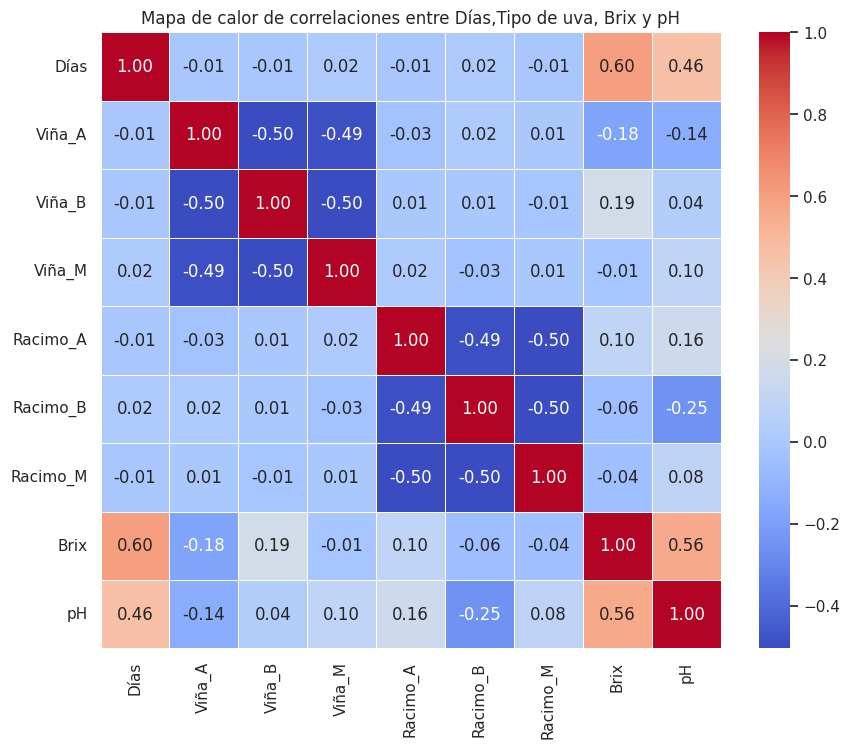

In [13]:
# Preparar los datos a partir de 'matriz_x' (Días, Tipo de uva)
X_datos = matriz_x[['Días', 'Tipo de uva']].copy()

# Extraer los caracteres específicos de 'Tipo de uva'
X_datos['Viña'] = X_datos['Tipo de uva'].str[-2]  # Segundo carácter desde el final (representa Viña)
X_datos['Racimo'] = X_datos['Tipo de uva'].str[-1]  # Último carácter (representa Racimo)

# Convertir las categorías de 'Viña' y 'Racimo'' en variables dummy
X_datos = pd.get_dummies(X_datos, columns=['Viña', 'Racimo'], drop_first=False)

# Eliminar las columnas originales no numéricas 'Tipo de uva'
X_datos = X_datos.drop(columns=['Tipo de uva'])

# Agregar las variables objetivo (Brix y pH) desde 'matriz_y'
X_datos['Brix'] = matriz_y['Brix']
X_datos['pH'] = matriz_y['pH']

# Calcular la matriz de correlación
correlacion = X_datos.corr()

# Visualizar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre Días,Tipo de uva, Brix y pH')
plt.show()


Resultados del mapa de calor demuestran los siguiente:

Para el Brix la variable más significativa es Días siguiendo de Viña_B (Posición de la Viña Baja) y Viña_A (Posición de la viña Alta).

Para el pH la variable más significativa es Días, siguiendo de Racimo_B (Posición del racimo Bajo) y Racimo_A (Posición del racimo Alto).

Existe una relación significativa entre las variables a predecir entre sí el Brix y el pH siendo estos valores de Matriz_y.

Por lo tanto, se concluye que las nuevas variables de entrada a sumar de la espectroscopía serán los Días y Tipo de uva para el entrenamiento de los modelos.


---
# Primera iteración
---

---
##Entrenamiento
---

Se plantea usar todos los datos posibles que tengan algún tipo de relación con los valores a predecir Brix y pH.

Para el tratamiento de preparar los datos se usarán todas las variables de espectros y se considerará las variables Días y Tipo de uva.

In [21]:
# Preparar los datos
X_completo = pd.concat([espectros, matriz_x[['Días', 'Tipo de uva']]], axis=1)

# Extraer los caracteres específicos de 'Tipo de uva' para crear 'Viña' y 'Racimo'
X_completo['Viña'] = X_completo['Tipo de uva'].str[-2]  # Segundo carácter desde el final (representa Viña)
X_completo['Racimo'] = X_completo['Tipo de uva'].str[-1]  # Último carácter (representa Racimo)

# Codificación de variables categóricas ('Viña' y 'Racimo')
X_completo = pd.get_dummies(X_completo, columns=['Viña', 'Racimo'], drop_first=False)

# Eliminar las columnas originales no numéricas 'Tipo de uva'
X_completo = X_completo.drop(columns=['Tipo de uva'])

# Normalizar solo la columna 'Días'
scaler = StandardScaler()

# Normalizamos solo la columna 'Días'
X_completo[['Días']] = scaler.fit_transform(X_completo[['Días']])
X_completo.columns = X_completo.columns.astype(str)

# Mostrar las primeras filas para verificar
X_completo.head()


,3988.60777133,3984.87661345,3981.14545557,3977.4142977,3973.68313982,3969.95198194,3966.22082406,3962.48966618,3958.75850831,3955.02735043,...,656.683786486,652.952628609,649.221470731,Días,Viña_A,Viña_B,Viña_M,Racimo_A,Racimo_B,Racimo_M
0,0.001575,0.001381,0.001887,0.002050,0.001939,0.001902,0.001750,0.001727,0.002137,0.002094,...,0.317923,0.325495,0.326862,-1.335944,True,False,False,True,False,False
1,0.002143,0.001930,0.001777,0.001958,0.002060,0.001659,0.001630,0.001898,0.002082,0.002067,...,0.326172,0.328379,0.338441,0.036702,True,False,False,True,False,False
2,0.002956,0.002737,0.002351,0.002265,0.002576,0.002746,0.002682,0.002805,0.002718,0.002583,...,0.324031,0.324659,0.326553,0.278933,True,False,False,True,False,False
3,0.002048,0.002536,0.002728,0.002640,0.002729,0.002341,0.002227,0.002296,0.002335,0.002507,...,0.324755,0.328160,0.332749,1.005628,True,False,False,True,False,False
4,0.002663,0.002558,0.002439,0.002571,0.002876,0.002784,0.002472,0.002142,0.002497,0.002699,...,0.319089,0.321750,0.328289,-1.335944,True,False,False,True,False,False


Al aplicar pd.get_dummies() para convertir la columna Tipo de uva en variables dummy, la columna original se convierte en varias columnas binarias, cada una representando la posición según la viña y del racimo, siendo A=Alto, B=Bajo y M=Medio.

Se realiza la separación de los datos para el entrenamiento y el test en un 70% y 30% ya que es el que mejor resultados da.

In [22]:
# Separar en conjunto de entrenamiento para Brix
y_brix = matriz_y.iloc[:, 0].values  # Seleccionar solo la columna de Brix
y_ph = matriz_y.iloc[:, 1].values  # Seleccionar solo la columna de pH

# Usar train_test_split para dividir los datos aleatoriamente
X_train, X_test, y_train, y_test = train_test_split(X_completo, y_brix, test_size=0.3, random_state=42)
# Usar train_test_split para dividir los datos de Brix y pH
X_train_ph, X_test_ph, y_train_ph, y_test_ph = train_test_split(X_completo, y_ph, test_size=0.3, random_state=42)

----
##Modelado para Brix
----

En esta sección de Predicción Brix se ha decidido entrenar distintos modelos de Machine Learning para poder seleccionar el que da mejores resultados con nuestros datos en la predicción del Brix.

**Regresión Lineal**

In [23]:
# Inicializar el modelo para Brix
lin_reg = LinearRegression()

# Ajustar el modelo para Brix
lin_reg.fit(X_train, y_train)

# Realizar predicciones para Brix
y_pred_lin = lin_reg.predict(X_test)

# Evaluar el modelo para Brix
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Regresión Lineal para Brix")
print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"Mean Absolute Error (MAE): {mae_lin}")
print(f"R-squared: {r2_lin}")

Regresión Lineal para Brix
Mean Squared Error (MSE): 1.5967164602340422
Mean Absolute Error (MAE): 0.7583899335973463
R-squared: 0.7541188462425978


**Árbol de Decisión**

In [24]:
# Inicializar el modelo
tree_reg = DecisionTreeRegressor()

# Ajustar el modelo
tree_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_reg.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Árbol de Decisión")
print(f"Mean Squared Error (MSE): {mse_tree}")
print(f"Mean Absolute Error (MAE): {mae_tree}")
print(f"R-squared: {r2_tree}\n")


Árbol de Decisión
Mean Squared Error (MSE): 2.3129629629629638
Mean Absolute Error (MAE): 0.9814814814814816
R-squared: 0.6438227975378219



**Random Forest**

In [25]:
# Inicializar el modelo
rf_reg = RandomForestRegressor()

# Ajustar el modelo
rf_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_reg.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared: {r2_rf}\n")


Random Forest
Mean Squared Error (MSE): 1.9263974814814797
Mean Absolute Error (MAE): 0.8685185185185184
R-squared: 0.7033506905336271



###Evaluación Modelos Brix

In [26]:
# Evaluación Modelos Brix
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin, mse_tree, mse_rf],
    'MAE': [mae_lin, mae_tree, mae_rf],
    'R-squared': [r2_lin, r2_tree, r2_rf]
})

print(resultados)


              Modelo       MSE       MAE  R-squared
0   Regresión Lineal  1.596716  0.758390   0.754119
1  Árbol de Decisión  2.312963  0.981481   0.643823
2      Random Forest  1.926397  0.868519   0.703351


----
##Modelado para pH
----

**Regresión Lineal**

In [27]:
# Inicializar el modelo de regresión lineal
lin_reg_brix_ph = LinearRegression()

# Ajustar el modelo usando los datos de entrenamiento
lin_reg_brix_ph.fit(X_train_ph, y_train_ph)

# Realizar predicciones para el conjunto de prueba
y_pred_ph = lin_reg_brix_ph.predict(X_test_ph)

# Evaluar el modelo para predecir pH
mse_ph_lin = mean_squared_error(y_test_ph, y_pred_ph)
mae_ph_lin = mean_absolute_error(y_test_ph, y_pred_ph)
r2_ph_lin = r2_score(y_test_ph, y_pred_ph)

print("Modelo de Regresión Lineal para pH")
print(f"Mean Squared Error (MSE): {mse_ph_lin}")
print(f"Mean Absolute Error (MAE): {mae_ph_lin}")
print(f"R-squared: {r2_ph_lin}\n")


Modelo de Regresión Lineal para pH
Mean Squared Error (MSE): 0.014117654210303919
Mean Absolute Error (MAE): 0.07915920782879905
R-squared: 0.2992312670694277



**Árbol de Decisión**

In [28]:
# Inicializar el modelo de Árbol de Decisión
tree_reg_brix_ph = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo usando los datos de entrenamiento (Brix como entrada, pH como salida)
tree_reg_brix_ph.fit(X_train_ph, y_train_ph)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_tree = tree_reg_brix_ph.predict(X_test_ph)

# Evaluar el modelo para predecir pH
mse_ph_tree = mean_squared_error(y_test_ph, y_pred_ph_tree)
mae_ph_tree = mean_absolute_error(y_test_ph, y_pred_ph_tree)
r2_ph_tree = r2_score(y_test_ph, y_pred_ph_tree)

print("Árbol de Decisión para pH:")
print(f"Mean Squared Error (MSE): {mse_ph_tree}")
print(f"Mean Absolute Error (MAE): {mae_ph_tree}")
print(f"R-squared: {r2_ph_tree}\n")


Árbol de Decisión para pH:
Mean Squared Error (MSE): 0.028599999999999997
Mean Absolute Error (MAE): 0.13333333333333333
R-squared: -0.41963993899117535



**Random Forest**

In [29]:
# Inicializar el modelo de Random Forest
rf_reg_brix_ph = RandomForestRegressor(n_estimators=200, random_state=42)

# Ajustar el modelo usando los datos de entrenamiento
rf_reg_brix_ph.fit(X_train_ph, y_train_ph)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_rf = rf_reg_brix_ph.predict(X_test_ph)

# Evaluar el modelo para predecir pH
mse_ph_rf = mean_squared_error(y_test_ph, y_pred_ph_rf)
mae_ph_rf = mean_absolute_error(y_test_ph, y_pred_ph_rf)
r2_ph_rf = r2_score(y_test_ph, y_pred_ph_rf)

# Imprimir los resultados
print("Random Forest para pH:")
print(f"Mean Squared Error (MSE): {mse_ph_rf}")
print(f"Mean Absolute Error (MAE): {mae_ph_rf}")
print(f"R-squared: {r2_ph_rf}\n")

Random Forest para pH:
Mean Squared Error (MSE): 0.013467197314814775
Mean Absolute Error (MAE): 0.08247962962962949
R-squared: 0.33151849040609194



###Evaluación Modelos pH

In [30]:
# Evaluación Modelos pH
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin, mse_ph_tree, mse_ph_rf],
    'MAE': [mae_ph_lin, mae_ph_tree, mae_ph_rf],
    'R-squared': [r2_ph_lin, r2_ph_tree, r2_ph_rf]
})

# Imprimir los resultados
print(resultados)


              Modelo       MSE       MAE  R-squared
0   Regresión Lineal  0.014118  0.079159   0.299231
1  Árbol de Decisión  0.028600  0.133333  -0.419640
2      Random Forest  0.013467  0.082480   0.331518


---
# Segunda iteración
---

Se realiza la preparación de datos sin pretratamiento para PCA.

###Análisis de Componentes Principales (PCA) sin Tratamiento

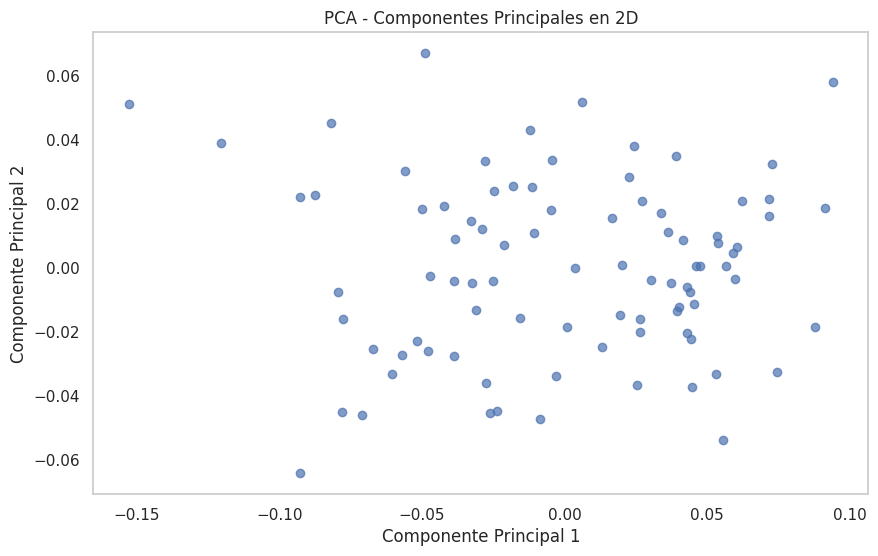

Varianza explicada por cada componente: [0.70863242 0.19642063]


In [ ]:
# Número de componentes a 2 para visualización en 2D
n_componentes = 2
pca = PCA(n_components=n_componentes)
componentes_principales_s = pca.fit_transform(espectros)

# Graficar en 2D si n_components=2
if n_componentes == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(componentes_principales_s[:, 0], componentes_principales_s[:, 1], alpha=0.7)
    plt.title('PCA - Componentes Principales en 2D')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid()
    plt.show()

# Si deseas ver la varianza explicada por cada componente:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

---
## Entrenamiento con PCA sin tratamiento
---

Se plantea usar todos los datos posibles que tengan algún tipo de relación con los valores a predecir Brix y pH.

Para el entrenamiento de preparar los datos se usarán todas las variables de espectros y se considerará las variables Días y Tipo de uva.

In [ ]:
# Crear un DataFrame con los componentes principales
df_componentes_principales = pd.DataFrame(componentes_principales_s, columns=['Componente 1', 'Componente 2'])

# Asegurarse de que matriz_x tenga un índice correcto
matriz_x.reset_index(drop=True, inplace=True)  # Reiniciar el índice si es necesario

# Agregar las columnas 'Días' y 'Tipo de uva' a los componentes principales
df_componentes_principales['Días'] = matriz_x['Días'].reset_index(drop=True)  # Asegurarse de que las longitudes coincidan
df_componentes_principales['Tipo de uva'] = matriz_x['Tipo de uva'].reset_index(drop=True)  # Asegurarse de que las longitudes coincidan

# Separar 'Tipo de uva' en dos nuevas columnas 'Racimo' y 'Viña'
df_componentes_principales['Viña'] = df_componentes_principales['Tipo de uva'].str[1]  # Segundo carácter
df_componentes_principales['Racimo'] = df_componentes_principales['Tipo de uva'].str[2]  # Tercer carácter

# Eliminar la columna 'Tipo de uva'
df_componentes_principales.drop(columns=['Tipo de uva'], inplace=True)

# Codificación de variables categóricas ('Viña' y 'Racimo')
df_componentes_principales = pd.get_dummies(df_componentes_principales, columns=['Viña', 'Racimo'], drop_first=False)

# Normalizar la columna 'Días'
scaler = StandardScaler()
df_componentes_principales[['Días']] = scaler.fit_transform(df_componentes_principales[['Días']])

# Mostrar el DataFrame resultante
print(df_componentes_principales.head())




   Componente 1  Componente 2      Días  Viña_A  Viña_B  Viña_M  Racimo_A  \
0     -0.004444      0.033659 -1.335944    True   False   False      True   
1     -0.055916      0.030414  0.036702    True   False   False      True   
2      0.026429     -0.020140  0.278933    True   False   False      True   
3      0.071908      0.016339  1.005628    True   False   False      True   
4     -0.004830      0.018244 -1.335944    True   False   False      True   

   Racimo_B  Racimo_M  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False  


Al aplicar pd.get_dummies() para convertir la columna Tipo de uva en variables dummy, la columna original se convierte en varias columnas binarias, cada una representando la posición según la viña y del racimo, siendo A=Alto, B=Bajo y M=Medio.

Se realiza la separación de los datos para el entrenamiento y el test en un 70% y 30% ya que es el que mejor resultados da.

In [ ]:
# Usar el DataFrame con los componentes principales (df_componentes_principales)
X_train_brix_pca, X_test_brix_pca, y_train_brix_pca, y_test_brix_pca = train_test_split(df_componentes_principales, y_brix, test_size=0.3, random_state=42)
X_train_ph_pca, X_test_ph_pca, y_train_ph_pca, y_test_ph_pca = train_test_split(df_componentes_principales, y_ph, test_size=0.3, random_state=42)


----
##Modelado para Brix con PCA sin tratamiento
----

En esta sección de Predicción Brix se ha decidido entrenar distintos modelos de Machine Learning para poder seleccionar el que da mejores resultados con nuestros datos en la predicción del Brix.

**Regresión Lineal**

In [ ]:
# Inicializar el modelo para Brix
lin_reg_pca = LinearRegression()

# Ajustar el modelo para Brix
lin_reg_pca.fit(X_train_brix_pca, y_train_brix_pca)

# Realizar predicciones para Brix
y_pred_lin_pca = lin_reg_pca.predict(X_test_brix_pca)

# Evaluar el modelo para Brix
mse_lin_pca = mean_squared_error(y_test_brix_pca, y_pred_lin_pca)
mae_lin_pca = mean_absolute_error(y_test_brix_pca, y_pred_lin_pca)
r2_lin_pca = r2_score(y_test_brix_pca, y_pred_lin_pca)

print("Regresión Lineal para Brix con PCA")
print(f"Mean Squared Error (MSE): {mse_lin_pca}")
print(f"Mean Absolute Error (MAE): {mae_lin_pca}")
print(f"R-squared: {r2_lin_pca}\n")


Regresión Lineal para Brix con PCA
Mean Squared Error (MSE): 1.4923738146407697
Mean Absolute Error (MAE): 0.6198050706231127
R-squared: 0.7701867523007675



**Árbol de Decisión**

In [ ]:
# Inicializar el modelo
tree_reg_pca = DecisionTreeRegressor()

# Ajustar el modelo
tree_reg_pca.fit(X_train_brix_pca, y_train_brix_pca)

# Realizar predicciones
y_pred_tree_pca = tree_reg_pca.predict(X_test_brix_pca)

# Evaluar el modelo
mse_tree_pca = mean_squared_error(y_test_brix_pca, y_pred_tree_pca)
mae_tree_pca = mean_absolute_error(y_test_brix_pca, y_pred_tree_pca)
r2_tree_pca = r2_score(y_test_brix_pca, y_pred_tree_pca)

print("Árbol de Decisión para Brix con PCA")
print(f"Mean Squared Error (MSE): {mse_tree_pca}")
print(f"Mean Absolute Error (MAE): {mae_tree_pca}")
print(f"R-squared: {r2_tree_pca}\n")


Árbol de Decisión para Brix con PCA
Mean Squared Error (MSE): 1.9440740740740747
Mean Absolute Error (MAE): 0.9962962962962961
R-squared: 0.7006286411971221



**Random Forest**

In [ ]:
# Inicializar el modelo
rf_reg_pca = RandomForestRegressor()

# Ajustar el modelo
rf_reg_pca.fit(X_train_brix_pca, y_train_brix_pca)

# Realizar predicciones
y_pred_rf_pca = rf_reg_pca.predict(X_test_brix_pca)

# Evaluar el modelo
mse_rf_pca = mean_squared_error(y_test_brix_pca, y_pred_rf_pca)
mae_rf_pca = mean_absolute_error(y_test_brix_pca, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test_brix_pca, y_pred_rf_pca)

print("Random Forest para Brix con PCA")
print(f"Mean Squared Error (MSE): {mse_rf_pca}")
print(f"Mean Absolute Error (MAE): {mae_rf_pca}")
print(f"R-squared: {r2_rf_pca}\n")


Random Forest para Brix con PCA
Mean Squared Error (MSE): 1.8280624444444382
Mean Absolute Error (MAE): 0.9082962962962945
R-squared: 0.7184934744677896



### Evaluación Modelos Brix con PCA sin tratamiento

In [ ]:
# Evaluación Modelos Brix con PCA sin tratamiento
resultados_pca = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin_pca, mse_tree_pca, mse_rf_pca],
    'MAE': [mae_lin_pca, mae_tree_pca, mae_rf_pca],
    'R-squared': [r2_lin_pca, r2_tree_pca, r2_rf_pca]
})

print(resultados_pca)


              Modelo       MSE       MAE  R-squared
0   Regresión Lineal  1.492374  0.619805   0.770187
1  Árbol de Decisión  1.944074  0.996296   0.700629
2      Random Forest  1.828062  0.908296   0.718493


----
##Modelado para pH con PCA sin tratamiento
----

**Regresión Lineal**

In [ ]:
# Inicializar el modelo de regresión lineal
lin_reg_brix_ph = LinearRegression()

# Ajustar el modelo usando los datos de entrenamiento
lin_reg_brix_ph.fit(X_train_ph_pca, y_train_ph_pca)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_pca = lin_reg_brix_ph.predict(X_test_ph_pca)

# Evaluar el modelo para predecir pH
mse_ph_lin_pca = mean_squared_error(y_test_ph_pca, y_pred_ph_pca)
mae_ph_lin_pca = mean_absolute_error(y_test_ph_pca, y_pred_ph_pca)
r2_ph_lin_pca = r2_score(y_test_ph_pca, y_pred_ph_pca)

print("Modelo de Regresión Lineal:")
print(f"Mean Squared Error: {mse_ph_lin_pca}")
print(f"Mean Absolute Error: {mae_ph_lin_pca}")
print(f"R-squared: {r2_ph_lin_pca}\n")

Modelo de Regresión Lineal:
Mean Squared Error: 0.016483747721363226
Mean Absolute Error: 0.08791009672525947
R-squared: 0.1817836849824468



**Árbol de Decisión**

In [ ]:
# Inicializar el modelo de Árbol de Decisión
tree_reg_brix_ph = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo usando los datos de entrenamiento (Brix como entrada, pH como salida)
tree_reg_brix_ph.fit(X_train_ph_pca, y_train_ph_pca)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_tree_pca = tree_reg_brix_ph.predict(X_test_ph_pca)

# Evaluar el modelo para predecir pH
mse_ph_tree_pca = mean_squared_error(y_test_ph_pca, y_pred_ph_tree_pca)
mae_ph_tree_pca = mean_absolute_error(y_test_ph_pca, y_pred_ph_tree_pca)
r2_ph_tree_pca = r2_score(y_test_ph_pca, y_pred_ph_tree_pca)

print("Árbol de Decisión:")
print(f"Mean Squared Error: {mse_ph_tree_pca}")
print(f"Mean Absolute Error: {mae_ph_tree_pca}")
print(f"R-squared: {r2_ph_tree_pca}\n")


Árbol de Decisión:
Mean Squared Error: 0.018866666666666677
Mean Absolute Error: 0.10666666666666673
R-squared: 0.06350092602679969



**Random Forest**

In [ ]:
# Inicializar el modelo de Random Forest
rf_reg_brix_ph = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo usando los datos de entrenamiento
rf_reg_brix_ph.fit(X_train_ph_pca, y_train_ph_pca)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_rf_pca = rf_reg_brix_ph.predict(X_test_ph_pca)

# Evaluar el modelo para predecir pH
mse_ph_rf_pca = mean_squared_error(y_test_ph_pca, y_pred_ph_rf_pca)
mae_ph_rf_pca = mean_absolute_error(y_test_ph_pca, y_pred_ph_rf_pca)
r2_ph_rf_pca = r2_score(y_test_ph_pca, y_pred_ph_rf_pca)

print("Random Forest:")
print(f"Mean Squared Error: {mse_ph_rf_pca}")
print(f"Mean Absolute Error: {mae_ph_rf_pca}")
print(f"R-squared: {r2_ph_rf_pca}\n")


Random Forest:
Mean Squared Error: 0.01408136444444439
Mean Absolute Error: 0.09317777777777767
R-squared: 0.30103260976141455



###Evaluación Modelos pH con PCA sin tratamiento

In [ ]:
#Evaluación Modelos pH con PCA sin tratamiento
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_pca, mse_ph_tree_pca, mse_ph_rf_pca],
    'MAE': [mae_ph_lin_pca, mae_ph_tree_pca, mae_ph_rf_pca],
    'R-squared': [r2_ph_lin_pca, r2_ph_tree_pca, r2_ph_rf_pca]
})

print(resultados)


              Modelo       MSE       MAE  R-squared
0   Regresión Lineal  0.016484  0.087910   0.181784
1  Árbol de Decisión  0.018867  0.106667   0.063501
2      Random Forest  0.014081  0.093178   0.301033


---
# Tercera iteración
---

Se realiza la preparación de datos con pretratamiento para PCA.

---
##Preparación de Datos PCA
---

Se realiza los siguientes pasos de pretratamiento para realizar un PCA

###Suavizado

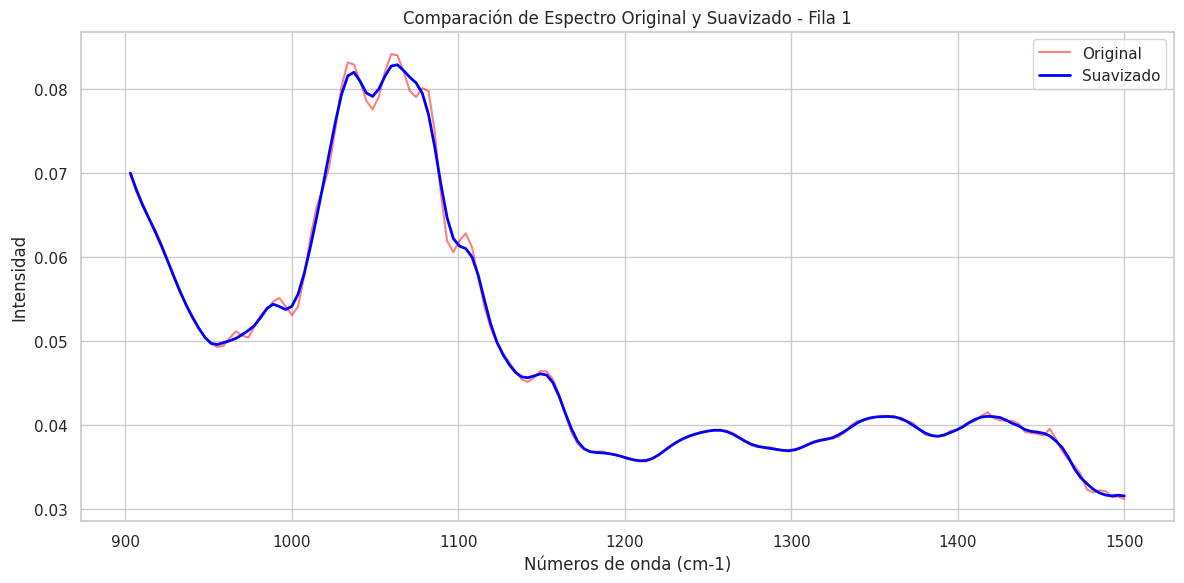

In [31]:
# Suavizar los datos espectrales
window_length = 9  # Impar
polyorder = 2      # Grado del polinomio para el suavizado
espectros_suavizados = savgol_filter(espectros, window_length=window_length, polyorder=polyorder, axis=1)

# Convertir a DataFrame para facilitar la manipulación
espectros_suavizados_df = pd.DataFrame(espectros_suavizados, columns=numeros_onda)

fila_a_graficar = 0

plt.figure(figsize=(12, 6))

# Graficar el espectro original filtrado
plt.plot(numeros_onda_filtrados_1, espectros_filtrados_1.iloc[fila_a_graficar, :],
         label='Original', color='red', alpha=0.5)

# Graficar el espectro suavizado y filtrado
plt.plot(numeros_onda_filtrados_1, espectros_suavizados_df.loc[fila_a_graficar, rango_espectros_1],
         label='Suavizado', linewidth=2, color='blue')

# Configuraciones del gráfico
plt.title(f'Comparación de Espectro Original y Suavizado - Fila {fila_a_graficar + 1}')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###Primera Derivada

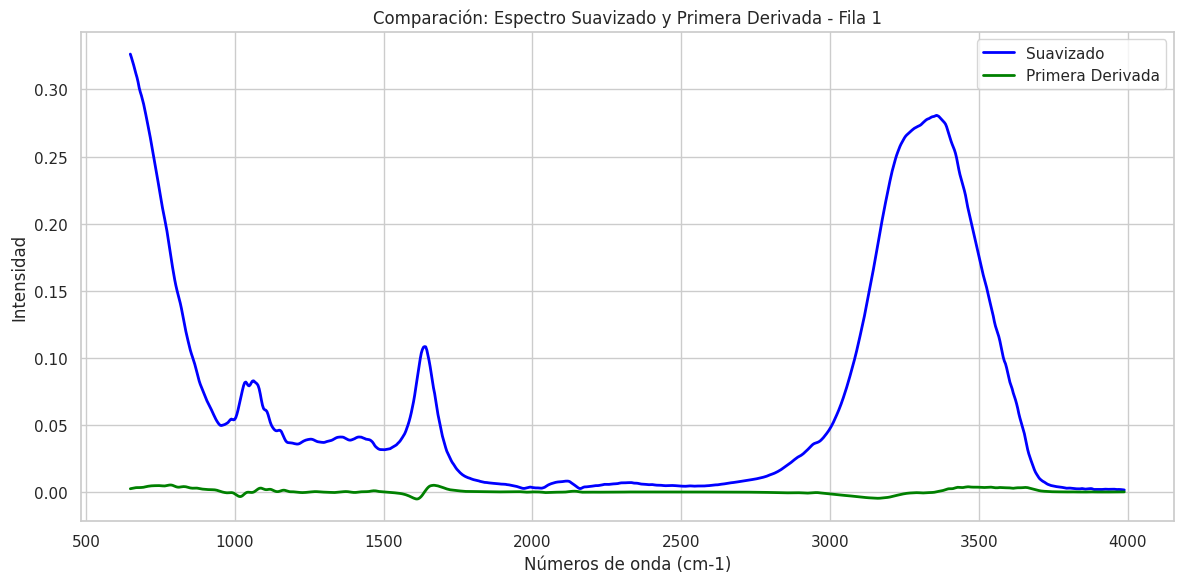

In [32]:
# Aplicar la primera derivada al espectro suavizado
derivada_1 = savgol_filter(espectros_suavizados, window_length=window_length, polyorder=polyorder, deriv=1, axis=1)

# Convertir la derivada a DataFrame para facilitar la manipulación
derivada_1_df = pd.DataFrame(derivada_1, columns=numeros_onda)

# Fila a graficar
fila_a_graficar = 0

# Graficar el espectro original, suavizado y la primera derivada
plt.figure(figsize=(12, 6))

# Graficar el espectro suavizado
plt.plot(numeros_onda, espectros_suavizados_df.iloc[fila_a_graficar, :], label='Suavizado', linewidth=2, color='blue')

# Graficar la primera derivada
plt.plot(numeros_onda, derivada_1_df.iloc[fila_a_graficar, :], label='Primera Derivada', linewidth=2, color='green')

# Configuración del gráfico
plt.title(f'Comparación: Espectro Suavizado y Primera Derivada - Fila {fila_a_graficar + 1}')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




###Normalización

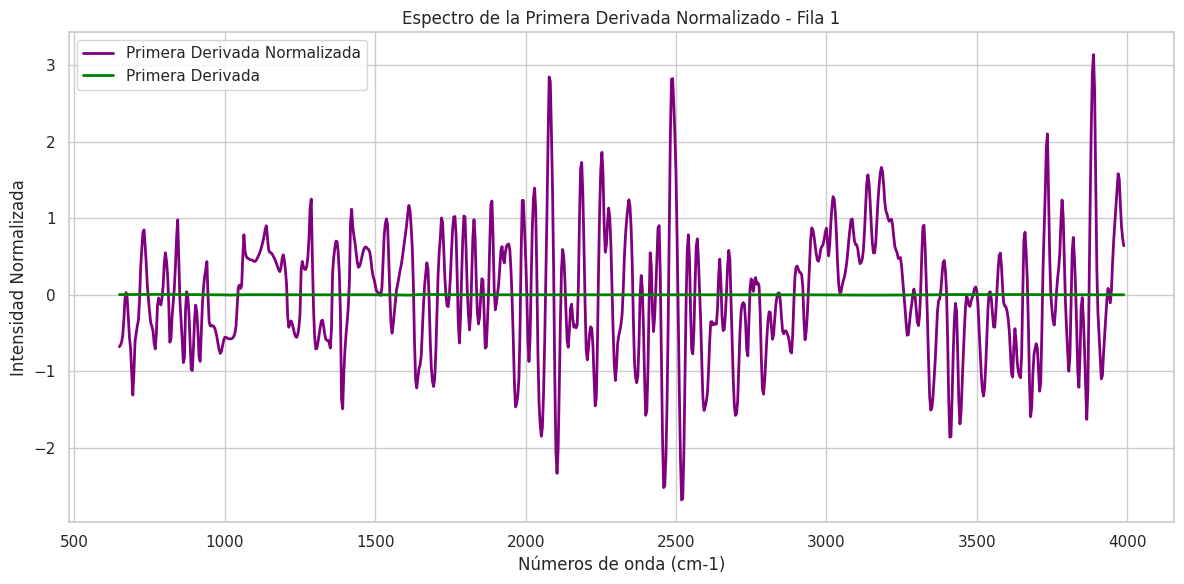

In [33]:
# Crear un objeto Z-score para normalizar entre 0 y 1
scaler = StandardScaler()

# Normalizar la primera derivada
derivada_1_normalizada = scaler.fit_transform(derivada_1_df)

# Convertir a DataFrame para facilitar la manipulación
derivada_1_normalizada_df = pd.DataFrame(derivada_1_normalizada, columns=numeros_onda)

# Graficar el espectro normalizado de la primera derivada
plt.figure(figsize=(12, 6))

# Graficar la primera derivada normalizada
plt.plot(numeros_onda, derivada_1_normalizada_df.iloc[fila_a_graficar, :], label='Primera Derivada Normalizada', color='purple', linewidth=2)

# Graficar la primera derivada
plt.plot(numeros_onda, derivada_1_df.iloc[fila_a_graficar, :], label='Primera Derivada', linewidth=2, color='green')

# Configuración del gráfico
plt.title(f'Espectro de la Primera Derivada Normalizado - Fila {fila_a_graficar + 1}')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad Normalizada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###Análisis de Componentes Principales (PCA)

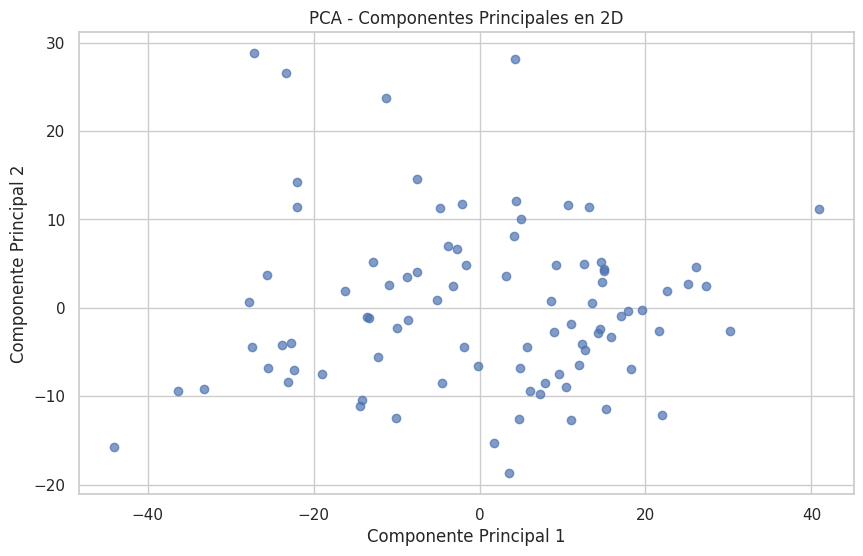

Varianza explicada por cada componente: [0.32209964 0.09946026]


In [34]:
# Aplicar PCA a todos los espectros SNV
n_componentes = 2
pca = PCA(n_components=n_componentes)

# Aplicar PCA a la matriz de espectros SNV
componentes_principales = pca.fit_transform(derivada_1_normalizada)

# Graficar los componentes principales en 2D
if n_componentes == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], alpha=0.7)
    plt.title('PCA - Componentes Principales en 2D')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.show()

# Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)


---
## Entrenamiento con PCA
---

Se plantea usar todos los datos posibles que tengan algún tipo de relación con los valores a predecir Brix y pH.

Para el entrenamiento de preparar los datos se usarán todas las variables de espectros y se considerará las variables Días y Tipo de uva.

In [35]:
# Crear un DataFrame con los componentes principales
df_componentes_principales_pca = pd.DataFrame(componentes_principales, columns=['Componente 1', 'Componente 2'])

# Asegurarse de que matriz_x tenga un índice correcto
matriz_x.reset_index(drop=True, inplace=True)  # Reiniciar el índice si es necesario

# Agregar las columnas 'Días' y 'Tipo de uva' a los componentes principales
df_componentes_principales_pca['Días'] = matriz_x['Días'].reset_index(drop=True)  # Asegurarse de que las longitudes coincidan
df_componentes_principales_pca['Tipo de uva'] = matriz_x['Tipo de uva'].reset_index(drop=True)  # Asegurarse de que las longitudes coincidan

# Separar 'Tipo de uva' en dos nuevas columnas 'Racimo' y 'Viña'
df_componentes_principales_pca['Viña'] = df_componentes_principales_pca['Tipo de uva'].str[1]  # Segundo carácter
df_componentes_principales_pca['Racimo'] = df_componentes_principales_pca['Tipo de uva'].str[2]  # Tercer carácter

# Eliminar la columna 'Tipo de uva'
df_componentes_principales_pca.drop(columns=['Tipo de uva'], inplace=True)

# Codificación de variables categóricas ('Viña' y 'Racimo')
df_componentes_principales_pca = pd.get_dummies(df_componentes_principales_pca, columns=['Viña', 'Racimo'], drop_first=False)

# Normalizar la columna 'Días'
scaler = StandardScaler()
df_componentes_principales_pca[['Días']] = scaler.fit_transform(df_componentes_principales_pca[['Días']])

# Mostrar el DataFrame resultante
print(df_componentes_principales_pca.head())



   Componente 1  Componente 2      Días  Viña_A  Viña_B  Viña_M  Racimo_A  \
0      4.095790      8.102850 -1.335944    True   False   False      True   
1     -7.547731     14.584022  0.036702    True   False   False      True   
2      5.697094     -4.428773  0.278933    True   False   False      True   
3     25.070763      2.754229  1.005628    True   False   False      True   
4     -1.580479      4.810130 -1.335944    True   False   False      True   

   Racimo_B  Racimo_M  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False  


Al aplicar pd.get_dummies() para convertir la columna Tipo de uva en variables dummy, la columna original se convierte en varias columnas binarias, cada una representando la posición según la viña y del racimo, siendo A=Alto, B=Bajo y M=Medio.

Se realiza la separación de los datos para el entrenamiento y el test en un 70% y 30% ya que es el que mejor resultados da.

In [40]:
# Usar el DataFrame con los componentes principales (df_componentes_principales)
X_train_brix_pca_t, X_test_brix_pca_t, y_train_brix_pca_t, y_test_brix_pca_t = train_test_split(df_componentes_principales_pca, y_brix, test_size=0.3, random_state=42)
X_train_ph_pca_t, X_test_ph_pca_t, y_train_ph_pca_t, y_test_ph_pca_t = train_test_split(df_componentes_principales_pca, y_ph, test_size=0.3, random_state=42)


----
##Modelado para Brix con PCA
----

En esta sección de Predicción Brix se ha decidido entrenar distintos modelos de Machine Learning para poder seleccionar el que da mejores resultados con nuestros datos en la predicción del Brix.

**Regresión Lineal**

In [ ]:
# Inicializar el modelo para Brix
lin_reg_pca = LinearRegression()

# Ajustar el modelo para Brix
lin_reg_pca.fit(X_train_brix_pca_t, y_train_brix_pca_t)

# Realizar predicciones para Brix
y_pred_lin_pca_t = lin_reg_pca.predict(X_test_brix_pca_t)

# Evaluar el modelo para Brix
mse_lin_pca_t = mean_squared_error(y_test_brix_pca_t, y_pred_lin_pca_t)
mae_lin_pca_t = mean_absolute_error(y_test_brix_pca_t, y_pred_lin_pca_t)
r2_lin_pca_t = r2_score(y_test_brix_pca_t, y_pred_lin_pca_t)

print("Regresión Lineal para Brix con PCA")
print(f"Mean Squared Error (MSE): {mse_lin_pca_t}")
print(f"Mean Absolute Error (MAE): {mae_lin_pca_t}")
print(f"R-squared: {r2_lin_pca_t}\n")


Regresión Lineal para Brix con PCA
Mean Squared Error (MSE): 1.3934352096647098
Mean Absolute Error (MAE): 0.5953877919645841
R-squared: 0.7854224807150005



In [64]:
# Validación Cruzada Regresión Lineal
# Crear el modelo de regresión lineal
lin_reg_pca = LinearRegression()

# Realizar validación cruzada para evaluar el modelo
# cross_val_score realiza la validación cruzada y devuelve las métricas
mse_scores = cross_val_score(lin_reg_pca, df_componentes_principales_pca, y_brix,
                             cv=5, scoring=make_scorer(mean_squared_error))

r2_scores = cross_val_score(lin_reg_pca, df_componentes_principales_pca, y_brix,
                             cv=5, scoring='r2')

# Promedio de las métricas
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()

# Mostrar los resultados
print("Regresión Lineal con PCA (Validación Cruzada)")
print(f"Mean Squared Error (MSE) promedio: {mean_mse}")
print(f"R-squared promedio: {mean_r2}")

Regresión Lineal con PCA (Validación Cruzada)
Mean Squared Error (MSE) promedio: 1.1405115620114732
R-squared promedio: 0.739473081179961


**Árbol de Decisión**

In [ ]:
# Inicializar el modelo
tree_reg_pca = DecisionTreeRegressor()

# Ajustar el modelo
tree_reg_pca.fit(X_train_brix_pca_t, y_train_brix_pca_t)

# Realizar predicciones
y_pred_tree_pca_t = tree_reg_pca.predict(X_test_brix_pca_t)

# Evaluar el modelo
mse_tree_pca_t = mean_squared_error(y_test_brix_pca_t, y_pred_tree_pca_t)
mae_tree_pca_t = mean_absolute_error(y_test_brix_pca_t, y_pred_tree_pca_t)
r2_tree_pca_t = r2_score(y_test_brix_pca_t, y_pred_tree_pca_t)

print("Árbol de Decisión para Brix con PCA")
print(f"Mean Squared Error (MSE): {mse_tree_pca_t}")
print(f"Mean Absolute Error (MAE): {mae_tree_pca_t}")
print(f"R-squared: {r2_tree_pca_t}\n")


Árbol de Decisión para Brix con PCA
Mean Squared Error (MSE): 3.44962962962963
Mean Absolute Error (MAE): 1.0666666666666664
R-squared: 0.46878551421413517



In [62]:
# Validación Cruzada Árbol de Decisión
# Inicializar el modelo de Árbol de Decisión
tree_reg_pca = DecisionTreeRegressor(random_state=42)

# Realizar validación cruzada para evaluar el modelo con MSE
mse_scores_tree = cross_val_score(tree_reg_pca, df_componentes_principales_pca, y_brix,
                                  cv=5, scoring=make_scorer(mean_squared_error))

# Realizar validación cruzada para evaluar el modelo con R-squared
r2_scores_tree = cross_val_score(tree_reg_pca, df_componentes_principales_pca, y_brix,
                                  cv=5, scoring='r2')

# Promedio de las métricas
mean_mse_tree = mse_scores_tree.mean()
mean_r2_tree = r2_scores_tree.mean()

# Mostrar los resultados
print("Árbol de Decisión con PCA (Validación Cruzada)")
print(f"Mean Squared Error (MSE) promedio: {mean_mse_tree}")
print(f"R-squared promedio: {mean_r2_tree}")



Árbol de Decisión con PCA (Validación Cruzada)
Mean Squared Error (MSE) promedio: 3.0493529411764713
R-squared promedio: 0.1364926933918263


**Random Forest**

In [ ]:
# Inicializar el modelo
rf_reg_pca = RandomForestRegressor()

# Ajustar el modelo
rf_reg_pca.fit(X_train_brix_pca_t, y_train_brix_pca_t)

# Realizar predicciones
y_pred_rf_pca_t = rf_reg_pca.predict(X_test_brix_pca_t)

# Evaluar el modelo
mse_rf_pca_t = mean_squared_error(y_test_brix_pca_t, y_pred_rf_pca_t)
mae_rf_pca_t = mean_absolute_error(y_test_brix_pca_t, y_pred_rf_pca_t)
r2_rf_pca_t = r2_score(y_test_brix_pca_t, y_pred_rf_pca_t)

print("Random Forest para Brix con PCA")
print(f"Mean Squared Error (MSE): {mse_rf_pca_t}")
print(f"Mean Absolute Error (MAE): {mae_rf_pca_t}")
print(f"R-squared: {r2_rf_pca_t}\n")


Random Forest para Brix con PCA
Mean Squared Error (MSE): 1.7635592962962956
Mean Absolute Error (MAE): 0.8984814814814807
R-squared: 0.728426426800056



In [65]:
# Validación cruzada Random Forest

# Inicializar el modelo de Random Forest
rf_reg_pca = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar validación cruzada para evaluar el modelo con MSE
mse_scores_rf = cross_val_score(rf_reg_pca, df_componentes_principales_pca, y_brix,
                                cv=5, scoring=make_scorer(mean_squared_error))

# Realizar validación cruzada para evaluar el modelo con R-squared
r2_scores_rf = cross_val_score(rf_reg_pca, df_componentes_principales_pca, y_brix,
                                cv=5, scoring='r2')

# Promedio de las métricas
mean_mse_rf = mse_scores_rf.mean()
mean_r2_rf = r2_scores_rf.mean()

# Mostrar los resultados
print("Random Forest con PCA (Validación Cruzada)")
print(f"Mean Squared Error (MSE) promedio: {mean_mse_rf}")
print(f"R-squared promedio: {mean_r2_rf}")


Random Forest con PCA (Validación Cruzada)
Mean Squared Error (MSE) promedio: 1.5800450830065413
R-squared promedio: 0.6313468838286135


###Evaluación Modelos Brix con PCA

In [ ]:
# Evaluación Modelos Brix con PCA
resultados_pca_t = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin_pca_t, mse_tree_pca_t, mse_rf_pca_t],
    'MAE': [mae_lin_pca_t, mae_tree_pca_t, mae_rf_pca_t],
    'R-squared': [r2_lin_pca_t, r2_tree_pca_t, r2_rf_pca_t]
})

print(resultados_pca_t)


              Modelo       MSE       MAE  R-squared
0   Regresión Lineal  1.393435  0.595388   0.785422
1  Árbol de Decisión  3.449630  1.066667   0.468786
2      Random Forest  1.763559  0.898481   0.728426


----
##Modelado para pH con PCA
----

**Regresión Lineal**

In [ ]:
# Inicializar el modelo de regresión lineal
lin_reg_brix_ph = LinearRegression()

# Ajustar el modelo usando los datos de entrenamiento
lin_reg_brix_ph.fit(X_train_ph_pca_t, y_train_ph_pca_t)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_pca_t = lin_reg_brix_ph.predict(X_test_ph_pca_t)

# Evaluar el modelo para predecir pH
mse_ph_lin_pca_t = mean_squared_error(y_test_ph_pca_t, y_pred_ph_pca_t)
mae_ph_lin_pca_t = mean_absolute_error(y_test_ph_pca_t, y_pred_ph_pca_t)
r2_ph_lin_pca_t = r2_score(y_test_ph_pca_t, y_pred_ph_pca_t)

print("Modelo de Regresión Lineal:")
print(f"Mean Squared Error: {mse_ph_lin_pca_t}")
print(f"Mean Absolute Error: {mae_ph_lin_pca_t}")
print(f"R-squared: {r2_ph_lin_pca_t}\n")

Modelo de Regresión Lineal:
Mean Squared Error: 0.016945322174995378
Mean Absolute Error: 0.0882747720315579
R-squared: 0.1588721629826485



**Árbol de Decisión**

In [ ]:
# Inicializar el modelo de Árbol de Decisión
tree_reg_brix_ph = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo usando los datos de entrenamiento (Brix como entrada, pH como salida)
tree_reg_brix_ph.fit(X_train_ph_pca_t, y_train_ph_pca_t)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_tree_pca_t = tree_reg_brix_ph.predict(X_test_ph_pca_t)

# Evaluar el modelo para predecir pH
mse_ph_tree_pca_t = mean_squared_error(y_test_ph_pca_t, y_pred_ph_tree_pca_t)
mae_ph_tree_pca_t = mean_absolute_error(y_test_ph_pca_t, y_pred_ph_tree_pca_t)
r2_ph_tree_pca_t = r2_score(y_test_ph_pca_t, y_pred_ph_tree_pca_t)

print("Árbol de Decisión:")
print(f"Mean Squared Error: {mse_ph_tree_pca_t}")
print(f"Mean Absolute Error: {mae_ph_tree_pca_t}")
print(f"R-squared: {r2_ph_tree_pca_t}\n")


Árbol de Decisión:
Mean Squared Error: 0.020840740740740715
Mean Absolute Error: 0.1196296296296296
R-squared: -0.034487689290771284



**Random Forest**

In [ ]:
# Inicializar el modelo de Random Forest
rf_reg_brix_ph = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo usando los datos de entrenamiento
rf_reg_brix_ph.fit(X_train_ph_pca_t, y_train_ph_pca_t)

# Realizar predicciones para el conjunto de prueba
y_pred_ph_rf_pca_t = rf_reg_brix_ph.predict(X_test_ph_pca_t)

# Evaluar el modelo para predecir pH
mse_ph_rf_pca_t = mean_squared_error(y_test_ph_pca_t, y_pred_ph_rf_pca_t)
mae_ph_rf_pca_t = mean_absolute_error(y_test_ph_pca_t, y_pred_ph_rf_pca_t)
r2_ph_rf_pca_t = r2_score(y_test_ph_pca_t, y_pred_ph_rf_pca_t)

print("Random Forest:")
print(f"Mean Squared Error: {mse_ph_rf_pca_t}")
print(f"Mean Absolute Error: {mae_ph_rf_pca_t}")
print(f"R-squared: {r2_ph_rf_pca_t}\n")


Random Forest:
Mean Squared Error: 0.012592947777777645
Mean Absolute Error: 0.08578148148148135
R-squared: 0.37491427919708686



###Evaluación Modelos pH con PCA

In [ ]:
#Evaluación Modelos pH con PCA
resultados_t = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_pca_t, mse_ph_tree_pca_t, mse_ph_rf_pca_t],
    'MAE': [mae_ph_lin_pca_t, mae_ph_tree_pca_t, mae_ph_rf_pca_t],
    'R-squared': [r2_ph_lin_pca_t, r2_ph_tree_pca_t, r2_ph_rf_pca_t]
})

print(resultados_t)


              Modelo       MSE       MAE  R-squared
0   Regresión Lineal  0.016945  0.088275   0.158872
1  Árbol de Decisión  0.020841  0.119630  -0.034488
2      Random Forest  0.012593  0.085781   0.374914


----
#Cuarta iteración
----

Se realiza el pretratamiento PCA específico para el pH y se le agregará a las variables de entrada el Brix.

---
##Preparación de Datos PCA para pH
---

Se realiza los siguientes pasos de pretratamiento para realizar un PCA

###Suavizado

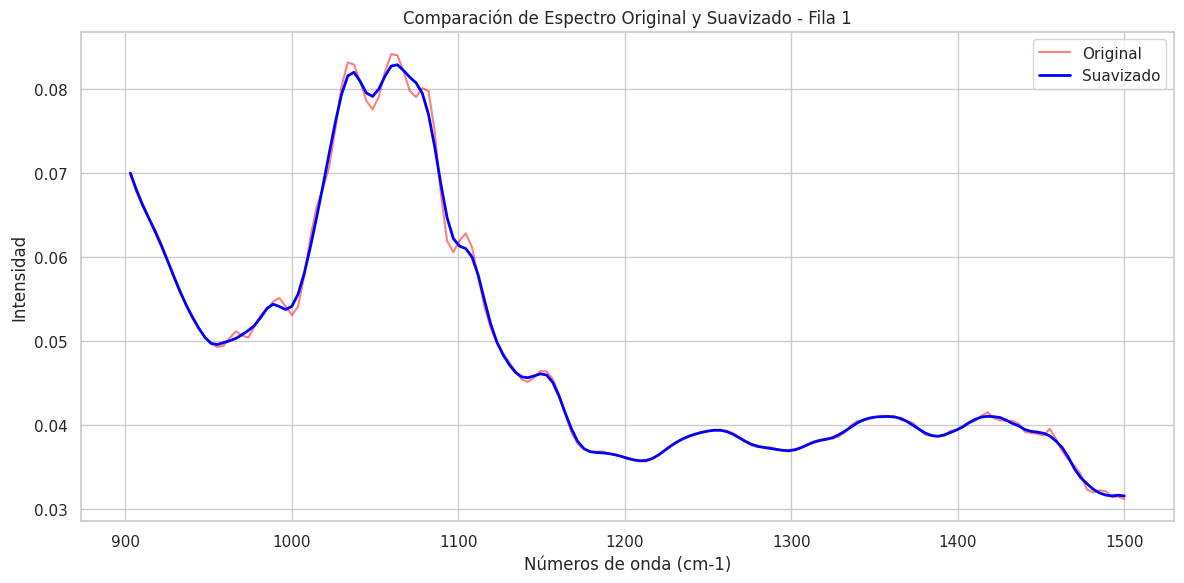

In [45]:
# Suavizar los datos espectrales
window_length = 9  # Impar
polyorder = 3      # Grado del polinomio para el suavizado
espectros_suavizados = savgol_filter(espectros, window_length=window_length, polyorder=polyorder, axis=1)

# Convertir a DataFrame para facilitar la manipulación
espectros_suavizados_df = pd.DataFrame(espectros_suavizados, columns=numeros_onda)

fila_a_graficar = 0

plt.figure(figsize=(12, 6))

# Graficar el espectro original filtrado
plt.plot(numeros_onda_filtrados_1, espectros_filtrados_1.iloc[fila_a_graficar, :],
         label='Original', color='red', alpha=0.5)

# Graficar el espectro suavizado y filtrado
plt.plot(numeros_onda_filtrados_1, espectros_suavizados_df.loc[fila_a_graficar, rango_espectros_1],
         label='Suavizado', linewidth=2, color='blue')

# Configuraciones del gráfico
plt.title(f'Comparación de Espectro Original y Suavizado - Fila {fila_a_graficar + 1}')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###Segunda Derivada

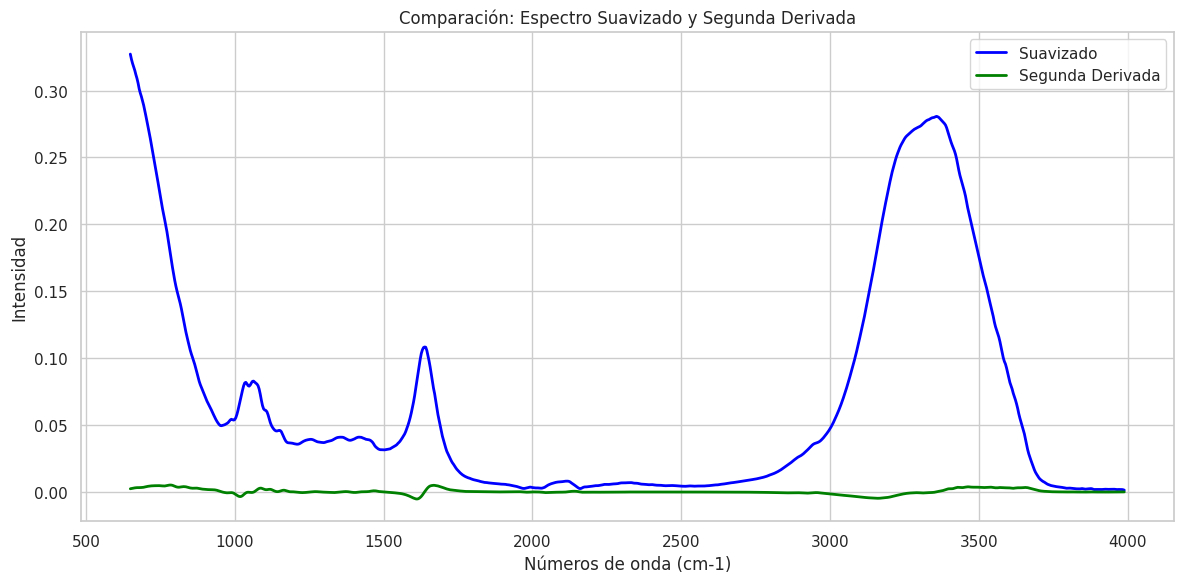

In [46]:
# Aplicar la primera derivada al espectro suavizado
derivada = savgol_filter(espectros_suavizados, window_length=window_length, polyorder=polyorder, deriv=2, axis=1)

# Convertir la derivada a DataFrame para facilitar la manipulación
derivada_df = pd.DataFrame(derivada, columns=numeros_onda)

# Fila a graficar
fila_a_graficar = 0

# Graficar el espectro original, suavizado y la derivada
plt.figure(figsize=(12, 6))

# Graficar el espectro suavizado
plt.plot(numeros_onda, espectros_suavizados_df.iloc[fila_a_graficar, :], label='Suavizado', linewidth=2, color='blue')

# Graficar la primera derivada
plt.plot(numeros_onda, derivada_1_df.iloc[fila_a_graficar, :], label='Segunda Derivada', linewidth=2, color='green')

# Configuración del gráfico
plt.title(f'Comparación: Espectro Suavizado y Segunda Derivada')
plt.xlabel('Números de onda (cm-1)')
plt.ylabel('Intensidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




###SNV

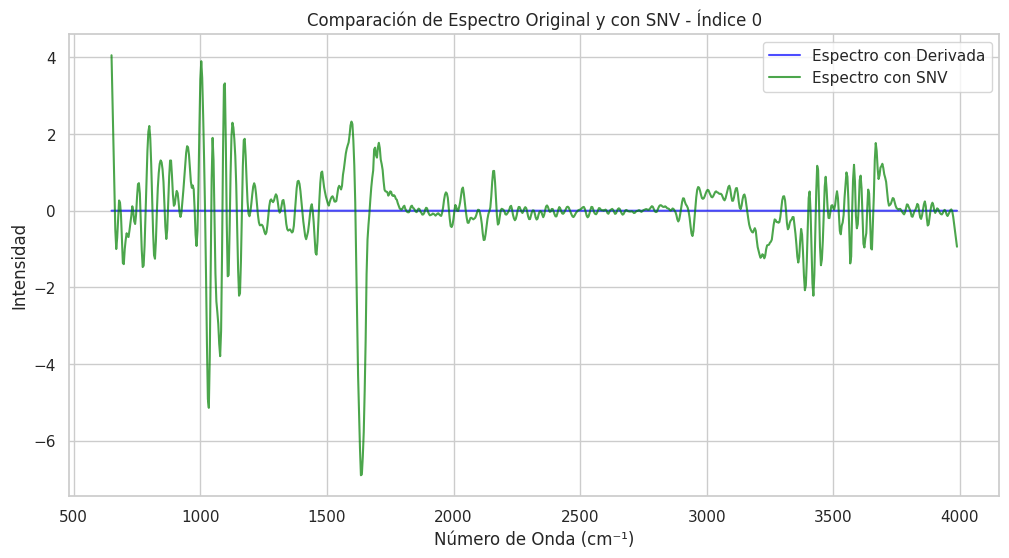

In [47]:
# Seleccionar el índice del espectro que deseas graficar
indice_espectro = 0

# Extraer el espectro original (sin SNV)
espectro_original = derivada_df.iloc[indice_espectro, :]

# Aplicar SNV a los datos
espectros_snv = (derivada_df - derivada_df.mean(axis=1).values.reshape(-1, 1)) / derivada_df.std(axis=1).values.reshape(-1, 1)

# Extraer el espectro después de aplicar SNV
espectro_snv = espectros_snv.iloc[indice_espectro, :]

# Graficar el espectro original y el espectro después de SNV
plt.figure(figsize=(12, 6))

# Graficar el espectro original
plt.plot(derivada_df.columns, espectro_original, label='Espectro con Derivada', color='blue', alpha=0.7)

# Graficar el espectro después de SNV
plt.plot(derivada_df.columns, espectro_snv, label='Espectro con SNV', color='green', alpha=0.7)

# Configuraciones del gráfico
plt.title(f'Comparación de Espectro Original y con SNV - Índice {indice_espectro}')
plt.xlabel('Número de Onda (cm⁻¹)')
plt.ylabel('Intensidad')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


###Análisis de Componentes Principales (PCA)

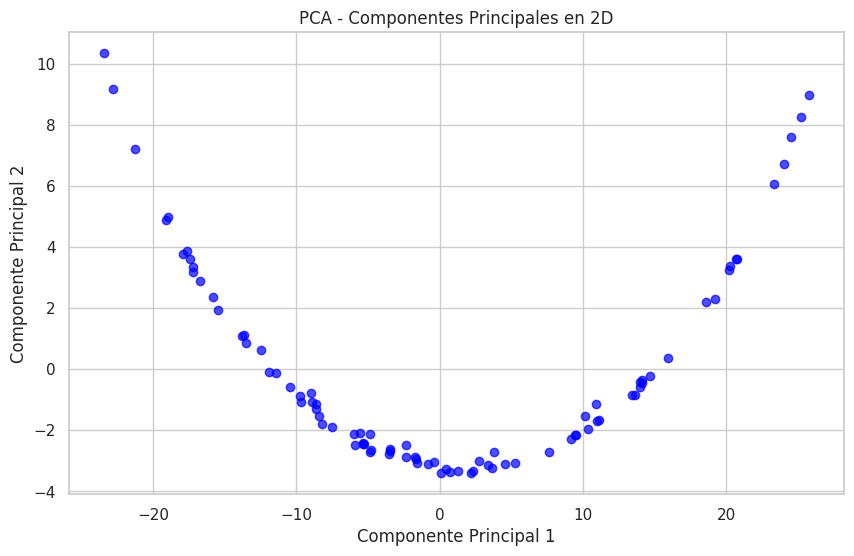

Varianza explicada por cada componente: [0.83436187 0.05859957]


In [48]:
# Definir el número de componentes principales
n_componentes = 2

# Crear una instancia de PCA y ajustar los datos normalizados
pca = PCA(n_components=n_componentes)
componentes_principales_ph = pca.fit_transform(espectros_snv)

# Crear un DataFrame con los componentes principales para facilitar el manejo
pca_df = pd.DataFrame(componentes_principales_ph, columns=[f'Componente Principal {i+1}' for i in range(n_componentes)])

# Graficar los componentes principales en 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Componente Principal 1'], pca_df['Componente Principal 2'], alpha=0.7, color='blue')
plt.title('PCA - Componentes Principales en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)


---
## Entrenamiento pH con variable de entrada Brix y PCA
---

Desde el resultado del PCA de "componentes_principales", se desarrolla un nuevo enfoque de entrenamiento para la predicción del Brix

In [49]:
# Crear un DataFrame con los componentes principales
df_componentes_principales_brix = pd.DataFrame(componentes_principales_ph, columns=['Componente 1', 'Componente 2'])

# Asegurarse de que matriz_x tenga un índice correcto
matriz_x.reset_index(drop=True, inplace=True)  # Reiniciar el índice si es necesario

# Agregar las columnas 'Días' y 'Tipo de uva' a los componentes principales
df_componentes_principales_brix['Días'] = matriz_x['Días'].reset_index(drop=True)  # Asegurarse de que las longitudes coincidan
df_componentes_principales_brix['Tipo de uva'] = matriz_x['Tipo de uva'].reset_index(drop=True)  # Asegurarse de que las longitudes coincidan

# Separar 'Tipo de uva' en dos nuevas columnas 'Racimo' y 'Viña'
df_componentes_principales_brix['Viña'] = df_componentes_principales_brix['Tipo de uva'].str[1]  # Segundo carácter
df_componentes_principales_brix['Racimo'] = df_componentes_principales_brix['Tipo de uva'].str[2]  # Tercer carácter

# Eliminar la columna 'Tipo de uva'
df_componentes_principales_brix.drop(columns=['Tipo de uva'], inplace=True)

# Agregar la columna de Brix
df_componentes_principales_brix['Brix'] = matriz_y['Brix'].reset_index(drop=True)  # Asegúrate de que la longitud coincida

# Normalizar la columna de Brix
scaler_brix = StandardScaler()
df_componentes_principales_brix[['Brix']] = scaler_brix.fit_transform(df_componentes_principales_brix[['Brix']])

# Codificación de variables categóricas ('Viña' y 'Racimo')
df_componentes_principales_brix = pd.get_dummies(df_componentes_principales_brix, columns=['Viña', 'Racimo'], drop_first=False)

# Normalizar la columna 'Días'
scaler_dias = StandardScaler()
df_componentes_principales_brix[['Días']] = scaler_dias.fit_transform(df_componentes_principales_brix[['Días']])

# Mostrar el DataFrame resultante
print(df_componentes_principales_brix.head())



   Componente 1  Componente 2      Días      Brix  Viña_A  Viña_B  Viña_M  \
0      3.622328     -3.221664 -1.335944 -1.815846    True   False   False   
1      0.722055     -3.364471  0.036702  0.421602    True   False   False   
2    -13.489254      0.849237  0.278933 -0.269973    True   False   False   
3     -3.492449     -2.603865  1.005628  1.438623    True   False   False   
4     10.342104     -1.941627 -1.335944 -0.188611    True   False   False   

   Racimo_A  Racimo_B  Racimo_M  
0      True     False     False  
1      True     False     False  
2      True     False     False  
3      True     False     False  
4      True     False     False  


Al aplicar pd.get_dummies() para convertir la columna Tipo de uva en variables dummy, la columna original se convierte en varias columnas binarias, cada una representando la posición según la viña y del racimo, siendo A=Alto, B=Bajo y M=Medio.

Se realiza la separación de los datos para el entrenamiento y el test en un 70% y 30% ya que es el que mejor resultados da.

In [50]:
# Separar en conjunto de entrenamiento para pH
y_ph_b = matriz_y.iloc[:, 1].values

# Usar el DataFrame con los componentes principales
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(df_componentes_principales_brix, y_ph_b, test_size=0.3, random_state=42)


----
##Modelado para pH con Brix y PCA
----

**Regresión Lineal**

In [51]:
# Inicializar el modelo de regresión lineal
lin_reg_brix_b = LinearRegression()

# Ajustar el modelo usando los datos de entrenamiento
lin_reg_brix_b.fit(X_train_b, y_train_b)

# Realizar predicciones para el conjunto de prueba
y_pred_b = lin_reg_brix_b.predict(X_test_b)

# Evaluar el modelo para predecir pH
mse_ph_lin_b= mean_squared_error(y_test_b, y_pred_b)
mae_ph_lin_b = mean_absolute_error(y_test_b, y_pred_b)
r2_ph_lin_b = r2_score(y_test_b, y_pred_b)

print("Modelo de Regresión Lineal:")
print(f"Mean Squared Error: {mse_ph_lin_b}")
print(f"Mean Absolute Error: {mae_ph_lin_b}")
print(f"R-squared: {r2_ph_lin_b}\n")

Modelo de Regresión Lineal:
Mean Squared Error: 0.013796443695620926
Mean Absolute Error: 0.08339743568384979
R-squared: 0.31517543754033295



**Árbol de Decisión**

In [52]:
# Inicializar el modelo de Árbol de Decisión
tree_reg_brix_ph = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo usando los datos de entrenamiento (Brix como entrada, pH como salida)
tree_reg_brix_ph.fit(X_train_b, y_train_b)

# Realizar predicciones para el conjunto de prueba
y_pred_b = tree_reg_brix_ph.predict(X_test_b)

# Evaluar el modelo para predecir pH
mse_ph_tree_b = mean_squared_error(y_test_b, y_pred_b)
mae_ph_tree_b = mean_absolute_error(y_test_b, y_pred_b)
r2_ph_tree_b = r2_score(y_test_b, y_pred_b)

print("Árbol de Decisión:")
print(f"Mean Squared Error: {mse_ph_tree_b}")
print(f"Mean Absolute Error: {mae_ph_tree_b}")
print(f"R-squared: {r2_ph_tree_b}\n")


Árbol de Decisión:
Mean Squared Error: 0.014422222222222225
Mean Absolute Error: 0.09481481481481484
R-squared: 0.284113193158296



**Random Forest**

In [53]:
# Inicializar el modelo de Random Forest
rf_reg_brix_ph = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo usando los datos de entrenamiento
rf_reg_brix_ph.fit(X_train_b, y_train_b)

# Realizar predicciones para el conjunto de prueba
y_pred_b = rf_reg_brix_ph.predict(X_test_b)

# Evaluar el modelo para predecir pH
mse_ph_rf_b = mean_squared_error(y_test_b, y_pred_b)
mae_ph_rf_b = mean_absolute_error(y_test_b, y_pred_b)
r2_ph_rf_b = r2_score(y_test_b, y_pred_b)

print("Random Forest:")
print(f"Mean Squared Error: {mse_ph_rf_b}")
print(f"Mean Absolute Error: {mae_ph_rf_b}")
print(f"R-squared: {r2_ph_rf_b}\n")


Random Forest:
Mean Squared Error: 0.008860527777777679
Mean Absolute Error: 0.0725740740740739
R-squared: 0.5601832477666462



###Evaluación Modelos pH con Brix y PCA

In [54]:
#Evaluación Modelos pH con Brix y PCA
resultados_b = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_b, mse_ph_tree_b, mse_ph_rf_b],
    'MAE': [mae_ph_lin_b, mae_ph_tree_b, mae_ph_rf_b],
    'R-squared': [r2_ph_lin_b, r2_ph_tree_b, r2_ph_rf_b]
})

print(resultados_b)

              Modelo       MSE       MAE  R-squared
0   Regresión Lineal  0.013796  0.083397   0.315175
1  Árbol de Decisión  0.014422  0.094815   0.284113
2      Random Forest  0.008861  0.072574   0.560183


---
#**Resultados**
---

##Análisis Precciones Brix

In [ ]:
# Evaluación Modelos Brix con PCA (Iteración 1)
resultados_pca_t = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin_pca_t, mse_tree_pca_t, mse_rf_pca_t],
    'MAE': [mae_lin_pca_t, mae_tree_pca_t, mae_rf_pca_t],
    'R-squared': [r2_lin_pca_t, r2_tree_pca_t, r2_rf_pca_t]
})

# Evaluación Modelos Brix con PCA sin tratamiento (Iteración 2)
resultados_pca = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin_pca, mse_tree_pca, mse_rf_pca],
    'MAE': [mae_lin_pca, mae_tree_pca, mae_rf_pca],
    'R-squared': [r2_lin_pca, r2_tree_pca, r2_rf_pca]
})

# Evaluación Modelos Brix (Iteración 3)
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin, mse_tree, mse_rf],
    'MAE': [mae_lin, mae_tree, mae_rf],
    'R-squared': [r2_lin, r2_tree, r2_rf]
})

# Añadir una columna que indica la iteración
resultados_pca_t['Iteración'] = 'PCA con Tratamiento'
resultados_pca['Iteración'] = 'PCA sin Tratamiento'
resultados['Iteración'] = 'Sin PCA'

# Concatenar los tres dataframes
resultados_completos = pd.concat([resultados, resultados_pca, resultados_pca_t], ignore_index=True)

# Reestructuración para crear subcolumnas (Métrica por Iteración)
resultados_completos = pd.melt(resultados_completos, id_vars=['Modelo', 'Iteración'], value_vars=['MSE', 'MAE', 'R-squared'],
                               var_name='Métrica', value_name='Valor')

# Pivotar la tabla para que las métricas estén como subcolumnas bajo cada iteración
resultados_pivot = resultados_completos.pivot_table(index=['Modelo'], columns=['Iteración', 'Métrica'], values='Valor')

# Mostrar la tabla final
display(resultados_pivot)



Iteración         PCA con Tratamiento                     PCA sin Tratamiento  \
Métrica                           MAE       MSE R-squared                 MAE   
Modelo                                                                          
Random Forest                0.898481  1.763559  0.728426            0.908296   
Regresión Lineal             0.595388  1.393435  0.785422            0.619805   
Árbol de Decisión            1.066667  3.449630  0.468786            0.996296   

Iteración                               Sin PCA                      
Métrica                 MSE R-squared       MAE       MSE R-squared  
Modelo                                                               
Random Forest      1.828062  0.718493  0.835815  1.821826  0.719454  
Regresión Lineal   1.492374  0.770187  0.758390  1.596716  0.754119  
Árbol de Decisión  1.944074  0.700629  1.048148  2.756667  0.575496

In [ ]:
# Evaluación Modelos Brix con PCA (Iteración 1)
resultados_pca_t = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin_pca_t, mse_tree_pca_t, mse_rf_pca_t],
    'MAE': [mae_lin_pca_t, mae_tree_pca_t, mae_rf_pca_t],
    'R-squared': [r2_lin_pca_t, r2_tree_pca_t, r2_rf_pca_t]
})

# Evaluación Modelos Brix con PCA sin tratamiento (Iteración 2)
resultados_pca = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin_pca, mse_tree_pca, mse_rf_pca],
    'MAE': [mae_lin_pca, mae_tree_pca, mae_rf_pca],
    'R-squared': [r2_lin_pca, r2_tree_pca, r2_rf_pca]
})

# Evaluación Modelos Brix (Iteración 3)
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_lin, mse_tree, mse_rf],
    'MAE': [mae_lin, mae_tree, mae_rf],
    'R-squared': [r2_lin, r2_tree, r2_rf]
})

# Añadir una columna que indica la iteración
resultados_pca_t['Iteración'] = 'PCA con Tratamiento'
resultados_pca['Iteración'] = 'PCA sin Tratamiento'
resultados['Iteración'] = 'Sin PCA'

# Concatenar los tres dataframes
resultados_completos = pd.concat([resultados, resultados_pca, resultados_pca_t], ignore_index=True)

# Reestructuración para crear subcolumnas (Métrica por Iteración)
resultados_completos = pd.melt(resultados_completos, id_vars=['Modelo', 'Iteración'], value_vars=['R-squared'],
                               var_name='Métrica', value_name='Valor')

# Pivotar la tabla para que las métricas estén como subcolumnas bajo cada iteración
resultados_pivot = resultados_completos.pivot_table(index=['Modelo'], columns=['Iteración', 'Métrica'], values='Valor')

# Mostrar la tabla final
display(resultados_pivot)



Iteración,PCA con Tratamiento,PCA sin Tratamiento,Sin PCA
Métrica,R-squared,R-squared,R-squared
Modelo,,,
Random Forest,0.728426,0.718493,0.719454
Regresión Lineal,0.785422,0.770187,0.754119
Árbol de Decisión,0.468786,0.700629,0.575496


##Análisis Precciones pH

In [ ]:
# Evaluación Modelos pH con Brix y PCA (Iteración 4)
resultados_b = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_b, mse_ph_tree_b, mse_ph_rf_b],
    'MAE': [mae_ph_lin_b, mae_ph_tree_b, mae_ph_rf_b],
    'R-squared': [r2_ph_lin_b, r2_ph_tree_b, r2_ph_rf_b]
})

# Evaluación Modelos pH con PCA (Iteración 3)
resultados_t = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_pca_t, mse_ph_tree_pca_t, mse_ph_rf_pca_t],
    'MAE': [mae_ph_lin_pca_t, mae_ph_tree_pca_t, mae_ph_rf_pca_t],
    'R-squared': [r2_ph_lin_pca_t, r2_ph_tree_pca_t, r2_ph_rf_pca_t]
})

# Evaluación Modelos pH con PCA sin tratamiento (Iteración 2)
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_pca, mse_ph_tree_pca, mse_ph_rf_pca],
    'MAE': [mae_ph_lin_pca, mae_ph_tree_pca, mae_ph_rf_pca],
    'R-squared': [r2_ph_lin_pca, r2_ph_tree_pca, r2_ph_rf_pca]
})

# Evaluación Modelos pH (Iteración 1)
resultados_4 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin, mse_ph_tree, mse_ph_rf],
    'MAE': [mae_ph_lin, mae_ph_tree, mae_ph_rf],
    'R-squared': [r2_ph_lin, r2_ph_tree, r2_ph_rf]
})

# Añadir una columna que indica la iteración
resultados_b['Iteración'] = 'Brix y PCA'
resultados_t['Iteración'] = 'PCA con Tratamiento'
resultados['Iteración'] = 'PCA sin Tratamiento'
resultados_4['Iteración'] = 'Sin PCA'

# Concatenar los cuatro dataframes
resultados_completos_ph = pd.concat([resultados_b, resultados_t, resultados, resultados_4], ignore_index=True)

# Reestructuración para crear subcolumnas (Métrica por Iteración)
resultados_completos_ph = pd.melt(resultados_completos_ph, id_vars=['Modelo', 'Iteración'], value_vars=['MSE', 'MAE', 'R-squared'],
                                  var_name='Métrica', value_name='Valor')

# Pivotar la tabla para que las métricas estén como subcolumnas bajo cada iteración
resultados_pivot_ph = resultados_completos_ph.pivot_table(index=['Modelo'], columns=['Iteración', 'Métrica'], values='Valor')

# Mostrar la tabla final
display(resultados_pivot_ph)


Iteración         Brix y PCA                     PCA con Tratamiento  \
Métrica                  MAE       MSE R-squared                 MAE   
Modelo                                                                 
Random Forest       0.072574  0.008861  0.560183            0.085781   
Regresión Lineal    0.083397  0.013796  0.315175            0.088275   
Árbol de Decisión   0.094815  0.014422  0.284113            0.119630   

Iteración                             PCA sin Tratamiento                      \
Métrica                 MSE R-squared                 MAE       MSE R-squared   
Modelo                                                                          
Random Forest      0.012593  0.374914            0.093178  0.014081  0.301033   
Regresión Lineal   0.016945  0.158872            0.087910  0.016484  0.181784   
Árbol de Decisión  0.020841 -0.034488            0.106667  0.018867  0.063501   

Iteración           Sin PCA                      
Métrica                 MAE       MSE R-squared  
Modelo                                           
Random Forest      0.082480  0.013467  0.331518  
Regresión Lineal   0.079159  0.014118  0.299231  
Árbol de Decisión  0.133333  0.028600 -0.419640

In [ ]:
# Evaluación Modelos pH con Brix y PCA (Iteración 4)
resultados_b = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_b, mse_ph_tree_b, mse_ph_rf_b],
    'MAE': [mae_ph_lin_b, mae_ph_tree_b, mae_ph_rf_b],
    'R-squared': [r2_ph_lin_b, r2_ph_tree_b, r2_ph_rf_b]
})

# Evaluación Modelos pH con PCA (Iteración 3)
resultados_t = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_pca_t, mse_ph_tree_pca_t, mse_ph_rf_pca_t],
    'MAE': [mae_ph_lin_pca_t, mae_ph_tree_pca_t, mae_ph_rf_pca_t],
    'R-squared': [r2_ph_lin_pca_t, r2_ph_tree_pca_t, r2_ph_rf_pca_t]
})

# Evaluación Modelos pH con PCA sin tratamiento (Iteración 2)
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin_pca, mse_ph_tree_pca, mse_ph_rf_pca],
    'MAE': [mae_ph_lin_pca, mae_ph_tree_pca, mae_ph_rf_pca],
    'R-squared': [r2_ph_lin_pca, r2_ph_tree_pca, r2_ph_rf_pca]
})

# Evaluación Modelos pH (Iteración 1)
resultados_4 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_ph_lin, mse_ph_tree, mse_ph_rf],
    'MAE': [mae_ph_lin, mae_ph_tree, mae_ph_rf],
    'R-squared': [r2_ph_lin, r2_ph_tree, r2_ph_rf]
})

# Añadir una columna que indica la iteración
resultados_b['Iteración'] = 'Brix y PCA'
resultados_t['Iteración'] = 'PCA con Tratamiento'
resultados['Iteración'] = 'PCA sin Tratamiento'
resultados_4['Iteración'] = 'Sin PCA'

# Concatenar los cuatro dataframes
resultados_completos_ph = pd.concat([resultados_b, resultados_t, resultados, resultados_4], ignore_index=True)

# Reestructuración para crear subcolumnas (Métrica por Iteración)
resultados_completos_ph = pd.melt(resultados_completos_ph, id_vars=['Modelo', 'Iteración'], value_vars=['R-squared'],
                                  var_name='Métrica', value_name='Valor')

# Pivotar la tabla para que las métricas estén como subcolumnas bajo cada iteración
resultados_pivot_ph = resultados_completos_ph.pivot_table(index=['Modelo'], columns=['Iteración', 'Métrica'], values='Valor')

# Mostrar la tabla final
display(resultados_pivot_ph)

Iteración,Brix y PCA,PCA con Tratamiento,PCA sin Tratamiento,Sin PCA
Métrica,R-squared,R-squared,R-squared,R-squared
Modelo,,,,
Random Forest,0.560183,0.374914,0.301033,0.331518
Regresión Lineal,0.315175,0.158872,0.181784,0.299231
Árbol de Decisión,0.284113,-0.034488,0.063501,-0.419640
